Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

from datetime import datetime, date
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#### load the movie dataset and create their dataframes
movies_df = pd.read_csv("movies.csv")

# Review initial columns & rows. 
movies_df.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

In [4]:
num_of_rows = len(movies_df)
print(num_of_rows)

4803


In [5]:
movies_df.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

In [6]:
# Review dataset information.
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

<AxesSubplot: >

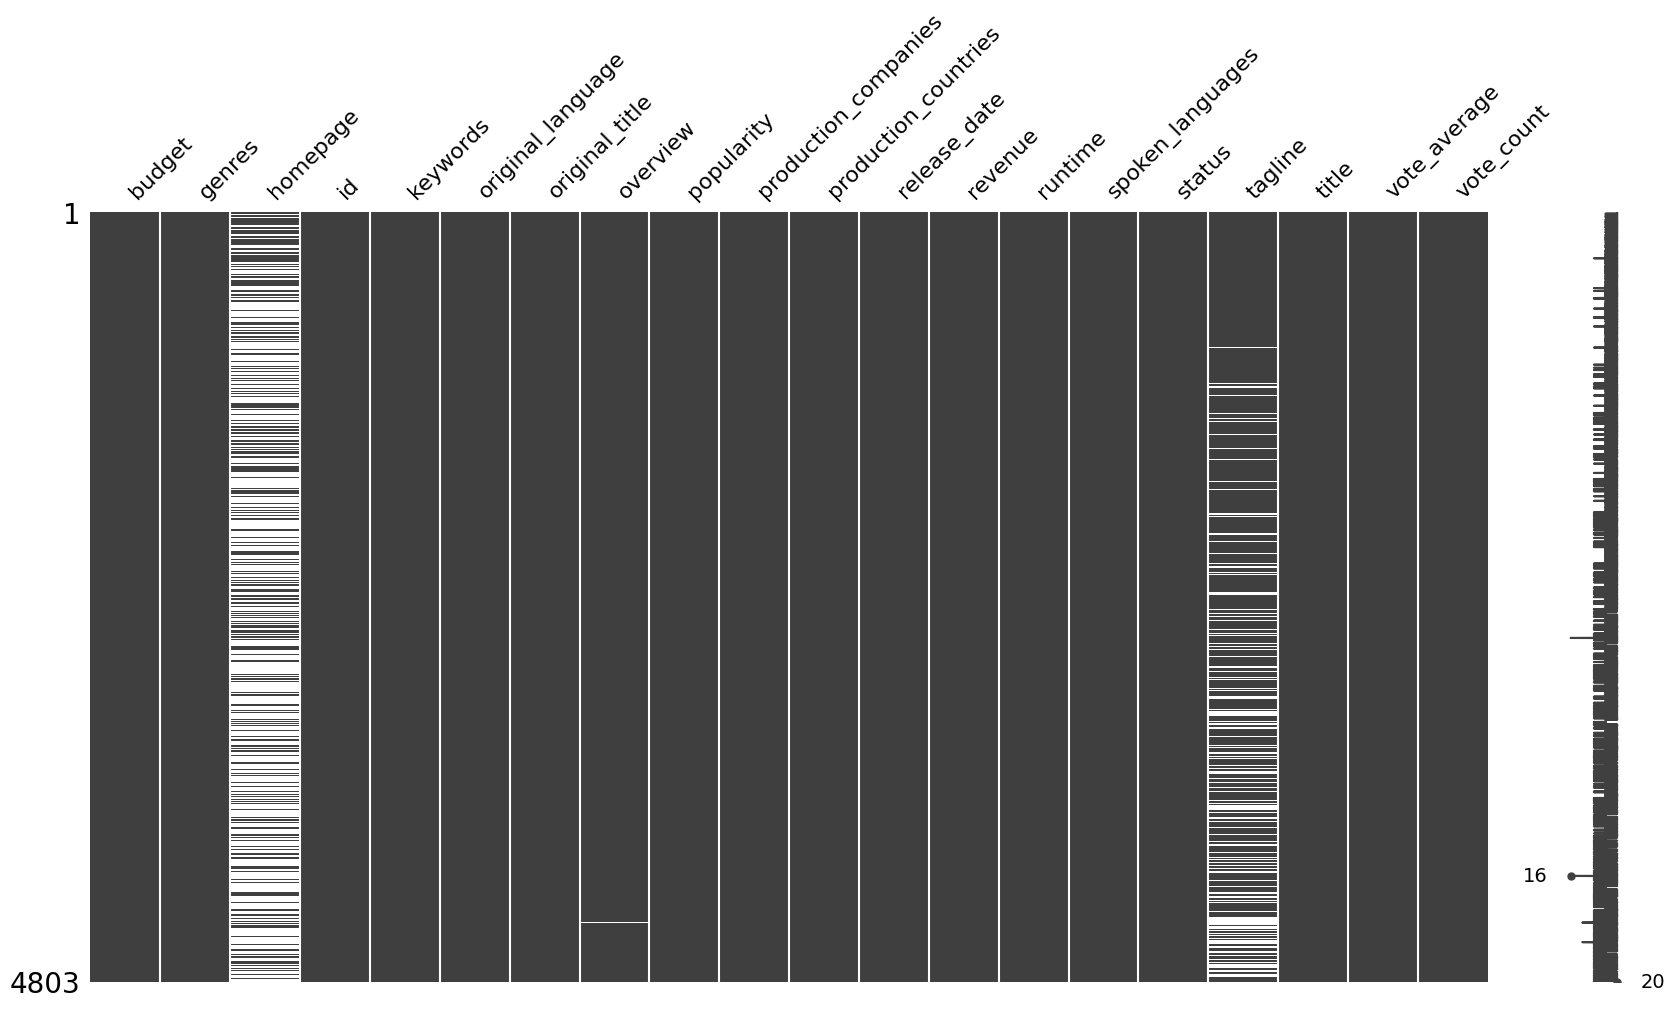

In [7]:
# Plot graphic of missing values
missingno.matrix(movies_df, figsize = (20,10))

In [8]:
# drop specified columns by label.
movies_df.drop(["keywords",
                "homepage",
                "status",
                "tagline",
                "original_language",
                "overview",
                "production_companies",
                "original_title"], 
               axis = 1, 
               inplace= True)

# Review dataframe.
movies_df.head(3)

budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   

      revenue  runtime                                   spoken_languages  \
0  2787965087    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1   961000000    169.0           [{"iso_639_1": "en", "name": "English"}]   
2   880674609    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

#### Remove any duplicate rows

In [9]:
# Remove duplicate rows (if present...)
movies_df = movies_df.drop_duplicates()
num_of_rows = len(movies_df)
print(num_of_rows)

4803


In [10]:
num_of_rows = len(movies_df)
print(num_of_rows)

4803


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [11]:
#### Using a mix of .unique() and .eq()

# From .unique(), there are x1037 films with budgets at '0'.
# There is x1 film by popularity equal to '0'.
# Genres/Production_Country/languages dictionary, maybe extra?
# Some production countries are blank. 
# Other notes, check release date columns formatted correctly.
# There are x1427 films by revenue equal to '0'.
# There are x35 films by runtime equal to '0'.
# There are x63 films by vote avg equal to '0'.
# There are x62 films by vote count equal to '0'.
# There are also a mix of '[]'. 

# On review of the '0' & '[]', these chould be removed.

In [12]:
# Lets look at unique values per column (only 1 shown)
uniq = movies_df["vote_count"].unique()
uniq_sorted = np.sort(uniq)
print(uniq_sorted)

[    0     1     2 ... 11800 12002 13752]


In [13]:
# Let see how many zeros are in per column.
zeros = movies_df["budget"].eq(0)
zero_count = zeros.sum()
print(zero_count)

# Lets look at how some of those columns look.
zeros = movies_df[zeros]
zeros.head()

1037


budget                                             genres      id  \
265       0  [{"id": 35, "name": "Comedy"}, {"id": 14, "nam...   10588   
321       0                     [{"id": 35, "name": "Comedy"}]   77953   
359       0  [{"id": 12, "name": "Adventure"}, {"id": 16, "...  258509   
406       0  [{"id": 18, "name": "Drama"}, {"id": 16, "name...   51052   
409       0  [{"id": 18, "name": "Drama"}, {"id": 10402, "n...   16858   

     popularity                               production_countries  \
265   18.251129  [{"iso_3166_1": "US", "name": "United States o...   
321   16.460356  [{"iso_3166_1": "US", "name": "United States o...   
359   27.867368  [{"iso_3166_1": "US", "name": "United States o...   
406   19.836830  [{"iso_3166_1": "US", "name": "United States o...   
409    5.159407  [{"iso_3166_1": "US", "name": "United States o...   

    release_date    revenue  runtime  \
265   2003-11-21          0     82.0   
321   2012-08-09  104907746     85.0   
359   2015-12-17  233755553     92.0   
406   2011-02-22          0     97.0   
409   1979-12-20   37823676    123.0   

                             spoken_languages  \
265  [{"iso_639_1": "en", "name": "English"}]   
321  [{"iso_639_1": "en", "name": "English"}]   
359  [{"iso_639_1": "en", "name": "English"}]   
406  [{"iso_639_1": "en", "name": "English"}]   
409  [{"iso_639_1": "en", "name": "English"}]   

                                      title  vote_average  vote_count  
265                      The Cat in the Hat           4.9         366  
321                            The Campaign           5.6         578  
359  Alvin and the Chipmunks: The Road Chip           5.8         428  
406                        Arthur Christmas           6.7         333  
409                           All That Jazz           7.3          85

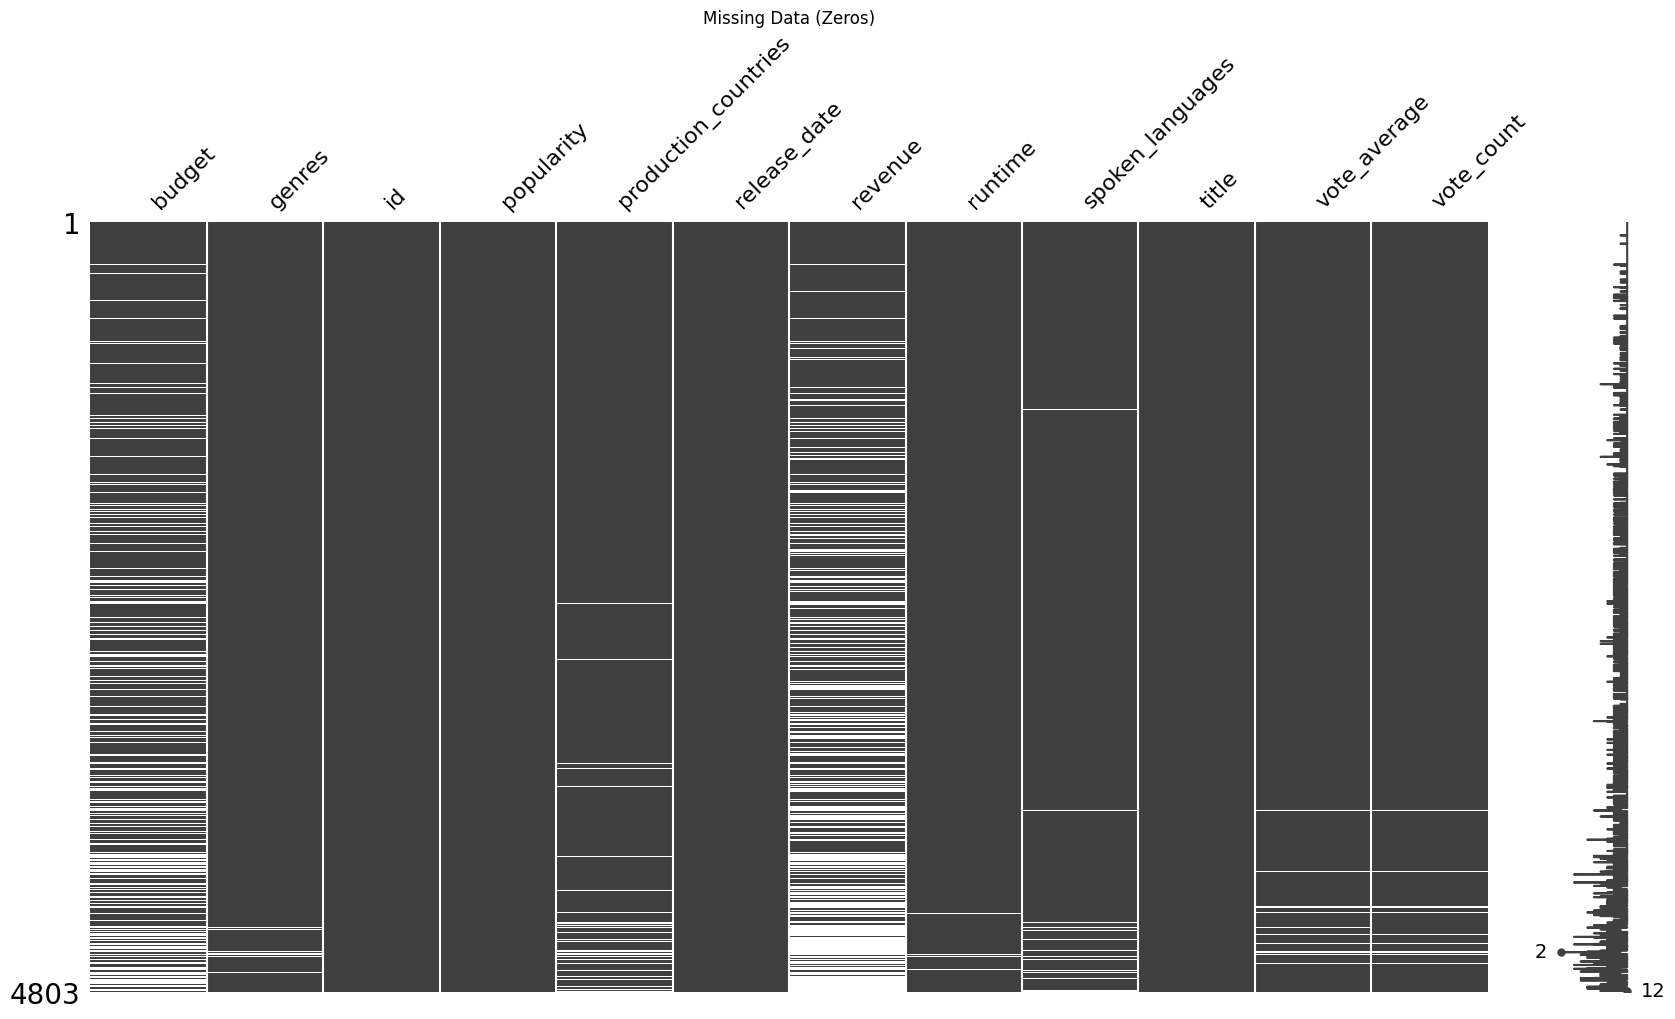

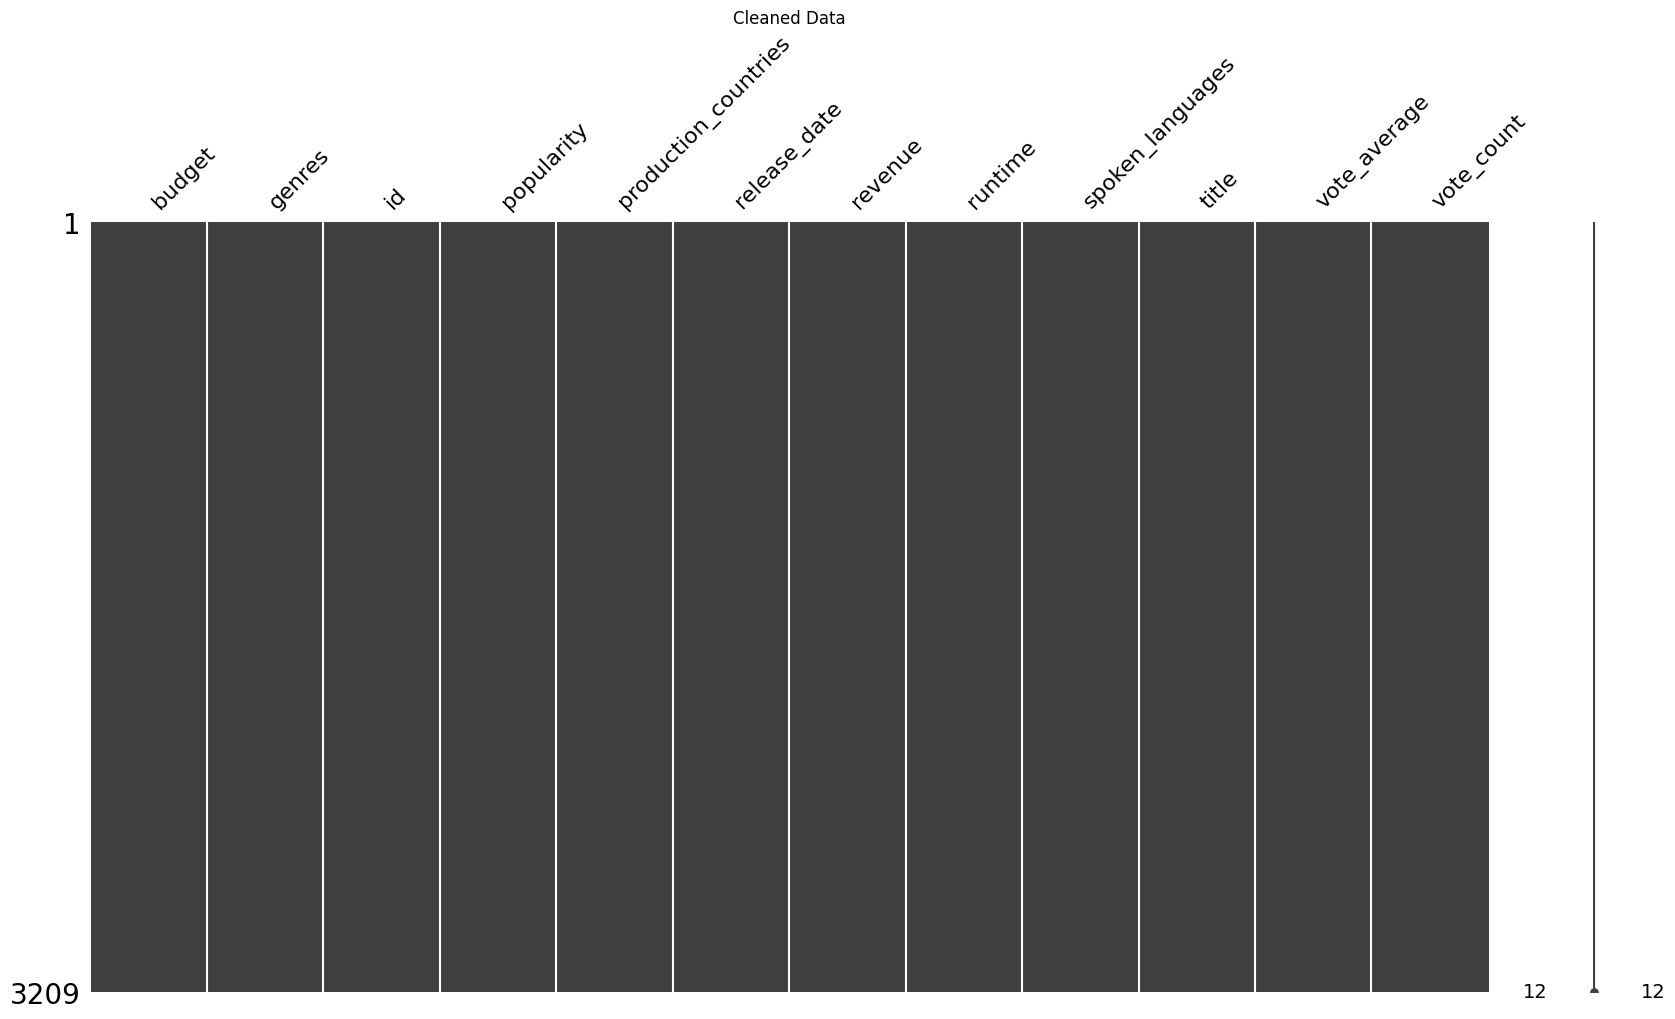

In [14]:
# Let replace all 0's with NaN values.
movies_df = movies_df.replace(0,np.nan)

# Let replace all []'s with NaN values.
movies_df = movies_df.replace('[]',np.nan)

# Plot graphic of missing values (to visualise)
missingno.matrix(movies_df, figsize = (20,10))
plt.title("Missing Data (Zeros)");

# Removes all rows with NaN values
movies_df = movies_df.dropna()

# Check all column counts.
movies_df.count()

# We are left with 3227 film entries.

# Plot graphic to visualise cleaning.
missingno.matrix(movies_df, figsize = (20,10))
plt.title("Cleaned Data");

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [15]:
# Lets double check data type per column (info() above also does this).
movies_df.dtypes 

budget                  float64
genres                   object
id                        int64
popularity              float64
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
title                    object
vote_average            float64
vote_count              float64
dtype: object

In [16]:
# print the first few rows of the date column
print(movies_df['release_date'].head())

# We are interested in '%Y-%m-%d' to convert.

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object


#### See the strftime directive guide table.

|Code	|Meaning	|Example |
|---------|-----------|---------------|
|%A	 |   Weekday as locale’s full name |	Wednesday |
|%a	 |   Weekday as locale’s abbreviated name |	Wed |
|%B	 |  Month as locale’s full name |	June |
|%d	 | Day of the month |	06 |
|%m	 |   Month as a number |	6 |
|%Y	 |  Four-digit year |	2018 |
|%y	 |  Two-digit year |	18 |


In [17]:
# Change the release_date column to DateTime column
movies_df["date_parsed"] = pd.to_datetime(movies_df["release_date"], format='%Y-%m-%d')

# Extract the release year from every release date
movies_df["year"] = movies_df['date_parsed'].dt.year

# Show revised datafram with new data columns.
movies_df.head()


budget                                             genres      id  \
0  237000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000.0  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000.0  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  112.312950  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4   43.926995  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

        revenue  runtime                                   spoken_languages  \
0  2.787965e+09    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1  9.610000e+08    169.0           [{"iso_639_1": "en", "name": "English"}]   
2  8.806746e+08    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3  1.084939e+09    165.0           [{"iso_639_1": "en", "name": "English"}]   
4  2.841391e+08    132.0           [{"iso_639_1": "en", "name": "English"}]   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2     11800.0   
1  Pirates of the Caribbean: At World's End           6.9      4500.0   
2                                   Spectre           6.3      4466.0   
3                     The Dark Knight Rises           7.6      9106.0   
4                               John Carter           6.1      2124.0   

  date_parsed  year  
0  2009-12-10  2009  
1  2007-05-19  2007  
2  2015-10-26  2015  
3  2012-07-16  2012  
4  2012-03-07  2012

In [18]:
# Lets look at unique values per column (only 1 shown)
uniq = movies_df["year"].unique()
uniq_sorted = np.sort(uniq)
print(uniq_sorted)

[1916 1927 1929 1930 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956
 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016]


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [19]:
# Cast budget/revenue columns from float64 to int64 data types.
# This will cause the decemical part to be truncated.
movies_df["budget"] = movies_df["budget"].astype("int64")
movies_df["revenue"] = movies_df["revenue"].astype("int64")

# Lets check class and appearance.
print(movies_df.dtypes) 
movies_df.head()

# Successful. 

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date                    object
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                     float64
date_parsed             datetime64[ns]
year                             int64
dtype: object


budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  112.312950  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4   43.926995  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

      revenue  runtime                                   spoken_languages  \
0  2787965087    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1   961000000    169.0           [{"iso_639_1": "en", "name": "English"}]   
2   880674609    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3  1084939099    165.0           [{"iso_639_1": "en", "name": "English"}]   
4   284139100    132.0           [{"iso_639_1": "en", "name": "English"}]   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2     11800.0   
1  Pirates of the Caribbean: At World's End           6.9      4500.0   
2                                   Spectre           6.3      4466.0   
3                     The Dark Knight Rises           7.6      9106.0   
4                               John Carter           6.1      2124.0   

  date_parsed  year  
0  2009-12-10  2009  
1  2007-05-19  2007  
2  2015-10-26  2015  
3  2012-07-16  2012  
4  2012-03-07  2012

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

# You did not show how to convert them into list or make them accessible...

In [20]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

budget                                             genres      id  \
0  237000000  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   19995   
1  300000000                 ['Adventure', 'Fantasy', 'Action']     285   
2  245000000                   ['Action', 'Adventure', 'Crime']  206647   
3  250000000           ['Action', 'Crime', 'Drama', 'Thriller']   49026   
4  260000000         ['Action', 'Adventure', 'Science Fiction']   49529   

   popularity                            production_countries release_date  \
0  150.437577  ['United States of America', 'United Kingdom']   2009-12-10   
1  139.082615                    ['United States of America']   2007-05-19   
2  107.376788  ['United Kingdom', 'United States of America']   2015-10-26   
3  112.312950                    ['United States of America']   2012-07-16   
4   43.926995                    ['United States of America']   2012-03-07   

      revenue  runtime                                   spoken_languages  \
0  2787965087    162.0                             ['English', 'Español']   
1   961000000    169.0                                        ['English']   
2   880674609    148.0  ['Français', 'English', 'Español', 'Italiano',...   
3  1084939099    165.0                                        ['English']   
4   284139100    132.0                                        ['English']   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2     11800.0   
1  Pirates of the Caribbean: At World's End           6.9      4500.0   
2                                   Spectre           6.3      4466.0   
3                     The Dark Knight Rises           7.6      9106.0   
4                               John Carter           6.1      2124.0   

  date_parsed  year  
0  2009-12-10  2009  
1  2007-05-19  2007  
2  2015-10-26  2015  
3  2012-07-16  2012  
4  2012-03-07  2012

### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [21]:
movies_df.describe()

budget             id   popularity       revenue      runtime  \
count  3.209000e+03    3209.000000  3209.000000  3.209000e+03  3209.000000   
mean   4.082934e+07   44558.983484    29.196643  1.219290e+08   110.741664   
std    4.444956e+07   74430.181442    36.215068  1.866717e+08    20.976064   
min    1.000000e+00       5.000000     0.019984  5.000000e+00    41.000000   
25%    1.100000e+07    4935.000000    10.651202  1.728630e+07    96.000000   
50%    2.500000e+07   11397.000000    20.566554  5.598732e+07   107.000000   
75%    5.500000e+07   44943.000000    37.492928  1.473327e+08   121.000000   
max    3.800000e+08  417859.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count         year  
count   3209.000000   3209.000000  3209.000000  
mean       6.317357    983.066064  2001.697725  
std        0.855196   1416.746424    13.226692  
min        2.300000      1.000000  1916.000000  
25%        5.800000    182.000000  1998.000000  
50%        6.300000    478.000000  2005.000000  
75%        6.900000   1150.000000  2010.000000  
max        8.500000  13752.000000  2016.000000

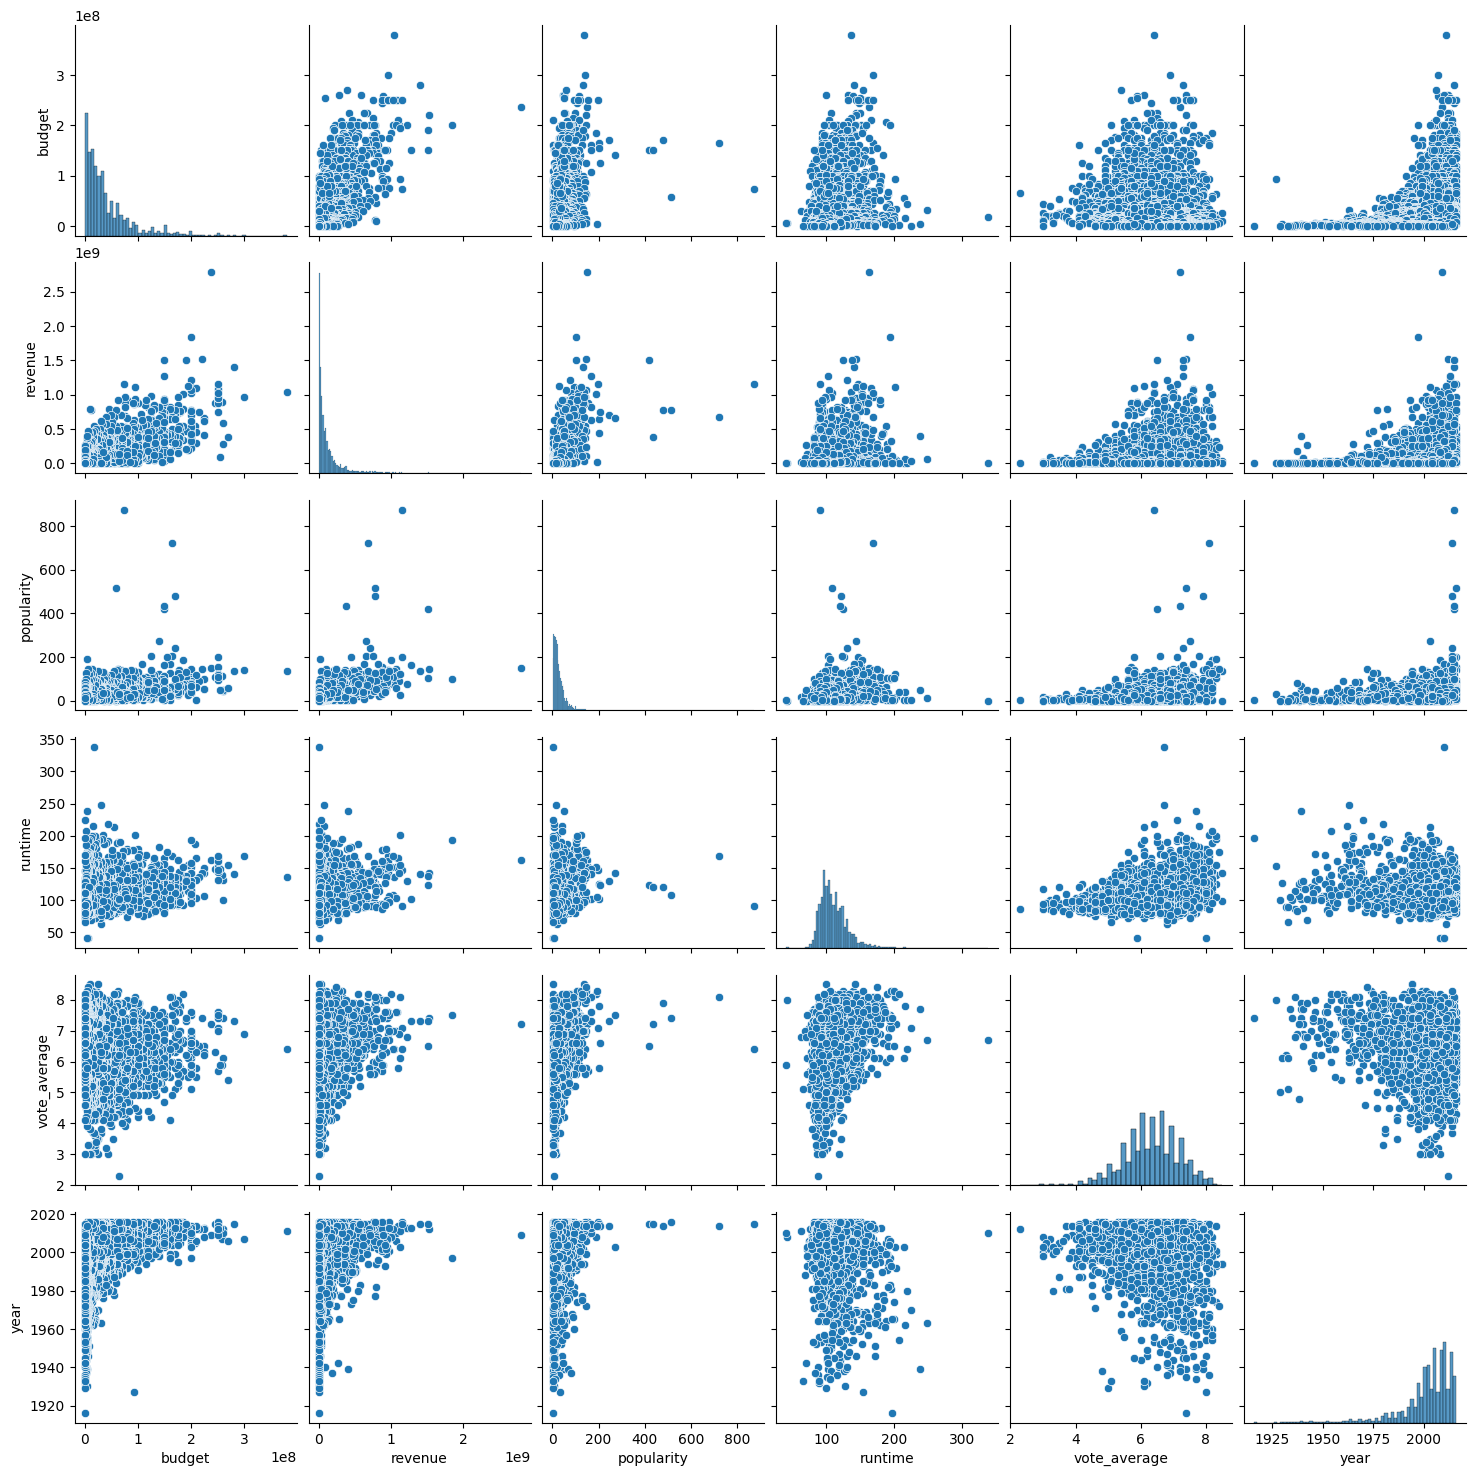

In [22]:
# All Budget/Revenue/popularity/vote_average/year Pairplots
sns.pairplot(movies_df, vars = ["budget","revenue", "popularity","runtime","vote_average","year"])

# Large spread with budget, investigate scaling, assume currency all same.
# Large spread with revenue, investigate standardising, assume currency all same.
# Large spread with popularity,investivate scaling, unknown unit but '0-1' will 
# gives us a better absolute feeling.
# Lets look at scaled versions. 

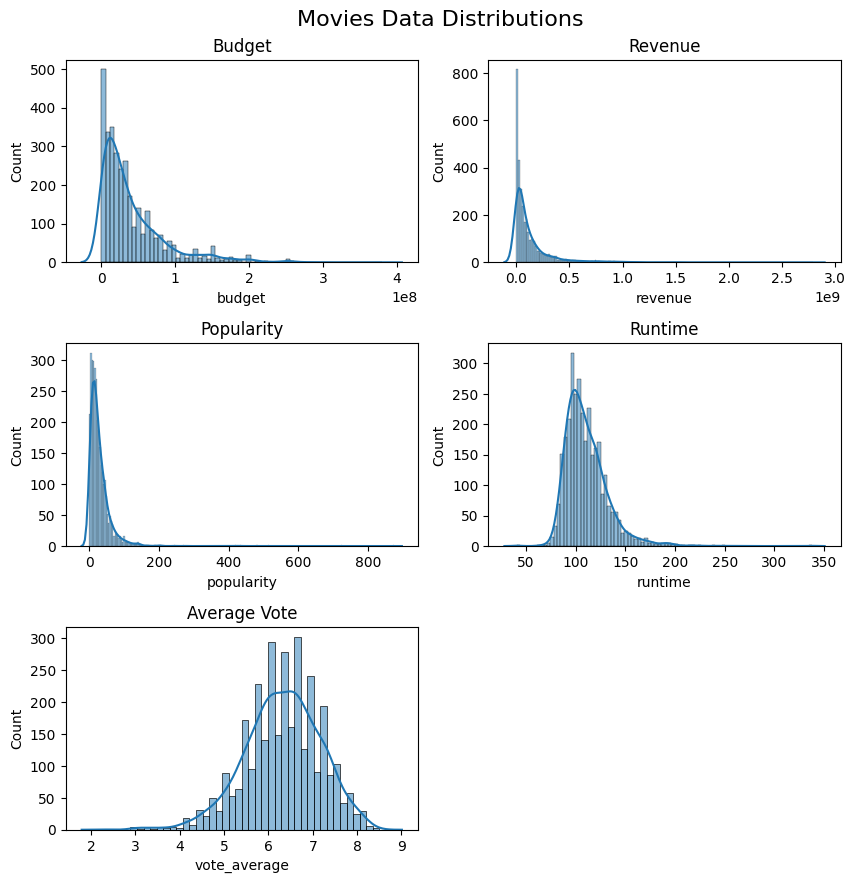

In [23]:
# Create a figure and specify the size
plt.figure(figsize = (10,10))
plt.subplots_adjust(hspace = 0.4)

# Create sup title
plt.suptitle("Movies Data Distributions", size = 16, y = 0.93)


# Create the first subplot
plt.subplot(3, 2, 1)
sns.histplot(x = "budget", data = movies_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Budget")

# Create the second subplot
plt.subplot(3, 2, 2)
sns.histplot(x = "revenue", data = movies_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Revenue")

# Create the third subplot
plt.subplot(3, 2, 3)
sns.histplot(x = "popularity", data = movies_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Popularity")

# Create the fourth subplot
plt.subplot(3, 2, 4)
sns.histplot(x = "runtime", data = movies_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Runtime")

# Create the fifth subplot
plt.subplot(3, 2, 5)
sns.histplot(x = "vote_average", data = movies_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Average Vote")

plt.show()


In [24]:
# From the movies dataset scale the 
# "budget","revenue", and "popularity" column

#### scale budget from 0 to 1
scaled_data1 = minmax_scaling(movies_df['budget'],
                             columns = [0]);

# Add scaled budget to df.
movies_df["scaled_budget"] = scaled_data1;

#### scale revenue from 0 to 1
scaled_data2 = minmax_scaling(movies_df['revenue'],
                             columns = [0]);

# Add scaled revenue to df.
movies_df["scaled_revenue"] = scaled_data2;

#### scale popularity from 0 to 1
scaled_data3 = minmax_scaling(movies_df['popularity'],
                             columns = [0]);

# Add scaled popularity to df.
movies_df["scaled_popularity"] = scaled_data3;

#### scale runtime from 0 to 1
scaled_data4 = minmax_scaling(movies_df['runtime'],
                             columns = [0]);

# Add scaled runtime to df.
movies_df["scaled_runtime"] = scaled_data4;

#### scale vote average from 0 to 1
scaled_data5 = minmax_scaling(movies_df['vote_average'],
                             columns = [0]);

# Add scaled runtime to df.
movies_df["scaled_voteavg"] = scaled_data5;

C:\Users\karlb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
C:\Users\karlb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
C:\Users\karlb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimen

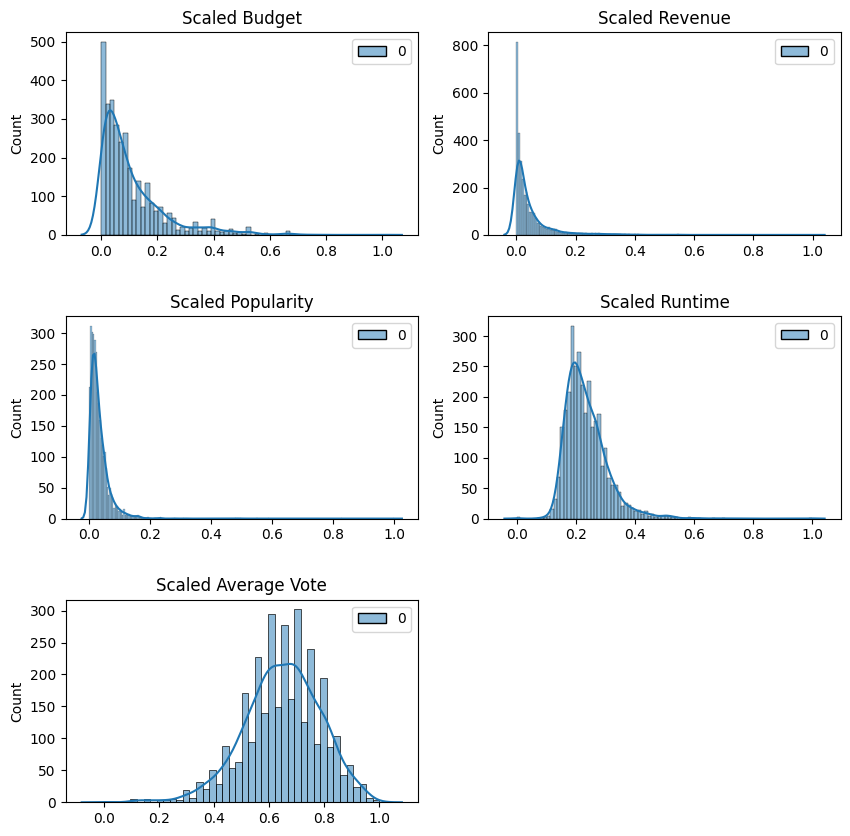

In [25]:
# Create a figure and specify the size
plt.figure(figsize = (10,10))
plt.subplots_adjust(hspace = 0.4)

# Create the first subplot
plt.subplot(3, 2, 1)
sns.histplot(data = scaled_data1, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Scaled Budget")

# Create the second subplot
plt.subplot(3, 2, 2)
sns.histplot(data = scaled_data2, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Scaled Revenue")

# Create the third subplot
plt.subplot(3, 2, 3)
sns.histplot(data = scaled_data3, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Scaled Popularity")

# Create the fourth subplot
plt.subplot(3, 2, 4)
sns.histplot(data = scaled_data4, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Scaled Runtime")

# Create the fifth subplot
plt.subplot(3, 2, 5)
sns.histplot(data = scaled_data5, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Scaled Average Vote")

plt.show()


In [26]:
"""
Do not standardise. 

# From the movies dataset standardise the 
# "budget","revenue", and "popularity" column

#### budget normalise the pledges (w/ Box-Cox)
positive_pledges1 = movies_df['budget']
normalised_pledges1 = stats.boxcox(positive_pledges1)[0]

# plot both together to compare
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(positive_pledges1, 
             kde = True, 
             kde_kws=dict(cut=3))       
plt.title("Original Data")

plt.subplot(1,2,2)
sns.histplot(normalised_pledges1,
             kde = True, 
             kde_kws=dict(cut=3))  
plt.title("Normalised data")
plt.suptitle("Budget Normalised")

plt.show()
plt.close()

# Add normalised budget to df.
movies_df["normalised_budget"] = normalised_pledges1

##### revenue normalise the pledges (w/ Box-Cox)
positive_pledges2 = movies_df['revenue']
normalised_pledges2 = stats.boxcox(positive_pledges2)[0]

# plot both together to compare
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(positive_pledges2, 
             kde = True, 
             kde_kws=dict(cut=3))       
plt.title("Original Data")


plt.subplot(1,2,2)
sns.histplot(normalised_pledges2,
             kde = True, 
             kde_kws=dict(cut=3))  
plt.title("Normalised data")
plt.suptitle("Revenue Normalised")

plt.show()
plt.close()

# Add normalised revenue to df.
movies_df["normalised_revenue"] = normalised_pledges2

##### popularity normalise the pledges (w/ Box-Cox)
positive_pledges3 = movies_df['popularity']
normalised_pledges3 = stats.boxcox(positive_pledges3)[0]

# plot both together to compare
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(positive_pledges3, 
             kde = True, 
             kde_kws=dict(cut=3))       
plt.title("Original Data")

plt.subplot(1,2,2)
sns.histplot(normalised_pledges3,
             kde = True, 
             kde_kws=dict(cut=3))  
plt.title("Normalised data")
plt.suptitle("Popularity Normalised")

plt.show()
plt.close()

# Add normalised popularity to df.
movies_df["normalised_popularity"] = normalised_pledges3
"""

'\nDo not standardise. \n\n# From the movies dataset standardise the \n# "budget","revenue", and "popularity" column\n\n#### budget normalise the pledges (w/ Box-Cox)\npositive_pledges1 = movies_df[\'budget\']\nnormalised_pledges1 = stats.boxcox(positive_pledges1)[0]\n\n# plot both together to compare\nplt.figure(figsize = (10,5))\n\nplt.subplot(1,2,1)\nsns.histplot(positive_pledges1, \n             kde = True, \n             kde_kws=dict(cut=3))       \nplt.title("Original Data")\n\nplt.subplot(1,2,2)\nsns.histplot(normalised_pledges1,\n             kde = True, \n             kde_kws=dict(cut=3))  \nplt.title("Normalised data")\nplt.suptitle("Budget Normalised")\n\nplt.show()\nplt.close()\n\n# Add normalised budget to df.\nmovies_df["normalised_budget"] = normalised_pledges1\n\n##### revenue normalise the pledges (w/ Box-Cox)\npositive_pledges2 = movies_df[\'revenue\']\nnormalised_pledges2 = stats.boxcox(positive_pledges2)[0]\n\n# plot both together to compare\nplt.figure(figsize = (1

In [27]:
# create profit column
movies_df["profit"] = 0
movies_df["profit"] = (movies_df["revenue"] - movies_df["budget"])

In [28]:
#### scale profit from 0 to 1
scaled_data = minmax_scaling(movies_df['profit'],
                             columns = [0]);

# Add scaled popularity to df.
movies_df["scaled_profit"] = scaled_data;

C:\Users\karlb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


In [29]:
# View title/profit columns in order
movies_df.loc[:,["title", "profit"]].sort_values(by = "profit", ascending=True)

title      profit
13                The Lone Ranger  -165710090
338                     The Alamo  -119180039
141               Mars Needs Moms  -111007242
208              The 13th Warrior   -98301101
311  The Adventures of Pluto Nash   -92896027
..                            ...         ...
16                   The Avengers  1299557910
44                      Furious 7  1316249360
28                 Jurassic World  1363528810
25                        Titanic  1645034188
0                          Avatar  2550965087

[3209 rows x 2 columns]

In [30]:
# Get top and bottom 5 by profit
top_5_profit= movies_df.nlargest(10,"profit")
bot_5_profit = movies_df.nsmallest(10, "profit")

# Combine top and bottom 5 by budget/revenue
top_bottom_films = pd.concat([top_5_profit, bot_5_profit])
top_bottom_films = top_bottom_films.drop_duplicates(subset = ["title"])

In [31]:
top_bottom_films

budget                                             genres      id  \
0     237000000  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   19995   
25    200000000                   ['Drama', 'Romance', 'Thriller']     597   
28    150000000  ['Action', 'Adventure', 'Science Fiction', 'Th...  135397   
44    190000000                                         ['Action']  168259   
16    220000000         ['Science Fiction', 'Action', 'Adventure']   24428   
7     280000000         ['Action', 'Adventure', 'Science Fiction']   99861   
124   150000000               ['Animation', 'Adventure', 'Family']  109445   
546    74000000     ['Family', 'Animation', 'Adventure', 'Comedy']  211672   
329    94000000                 ['Adventure', 'Fantasy', 'Action']     122   
31    200000000         ['Action', 'Adventure', 'Science Fiction']   68721   
13    255000000                 ['Action', 'Adventure', 'Western']   57201   
338   145000000                      ['Western', 'History', 'War']   10733   
141   150000000               ['Adventure', 'Animation', 'Family']   50321   
208   160000000                 ['Adventure', 'Fantasy', 'Action']    1911   
311   100000000            ['Action', 'Comedy', 'Science Fiction']   11692   
2638   92620000                       ['Drama', 'Science Fiction']      19   
340    98000000                            ['Action', 'Adventure']    1408   
142   149000000     ['Adventure', 'Animation', 'Comedy', 'Family']   11619   
192   130000000                                          ['Drama']    6972   
775    90000000          ['Horror', 'Science Fiction', 'Thriller']   10384   

      popularity                               production_countries  \
0     150.437577     ['United States of America', 'United Kingdom']   
25    100.025899                       ['United States of America']   
28    418.708552                       ['United States of America']   
44    102.322217              ['Japan', 'United States of America']   
16    144.448633                       ['United States of America']   
7     134.279229                       ['United States of America']   
124   165.125366                       ['United States of America']   
546   875.581305                       ['United States of America']   
329   123.630332        ['New Zealand', 'United States of America']   
31     77.682080              ['China', 'United States of America']   
13     49.046956                       ['United States of America']   
338    10.660441                       ['United States of America']   
141    12.362599                       ['United States of America']   
208    27.220157                       ['United States of America']   
311    12.092241          ['Australia', 'United States of America']   
2638   32.351527                                        ['Germany']   
340     7.029308  ['France', 'Germany', 'Italy', 'United States ...   
142    22.550135     ['United Kingdom', 'United States of America']   
192    28.840997  ['Australia', 'United States of America', 'Uni...   
775     5.762037        ['Switzerland', 'United States of America']   

     release_date     revenue  runtime  \
0      2009-12-10  2787965087    162.0   
25     1997-11-18  1845034188    194.0   
28     2015-06-09  1513528810    124.0   
44     2015-04-01  1506249360    137.0   
16     2012-04-25  1519557910    143.0   
7      2015-04-22  1405403694    141.0   
124    2013-11-27  1274219009    102.0   
546    2015-06-17  1156730962     91.0   
329    2003-12-01  1118888979    201.0   
31     2013-04-18  1215439994    130.0   
13     2013-07-03    89289910    149.0   
338    2004-04-07    25819961    137.0   
141    2011-03-09    38992758     88.0   
208    1999-08-27    61698899    102.0   
311    2002-08-15     7103973     95.0   
2638   1927-01-10      650422    153.0   
340    1995-12-22    10017322    119.0   
142    2006-10-22    64459316     85.0   
192    2008-11-18    49554002    165.0   
775    2000-01-14    14828081     91.0

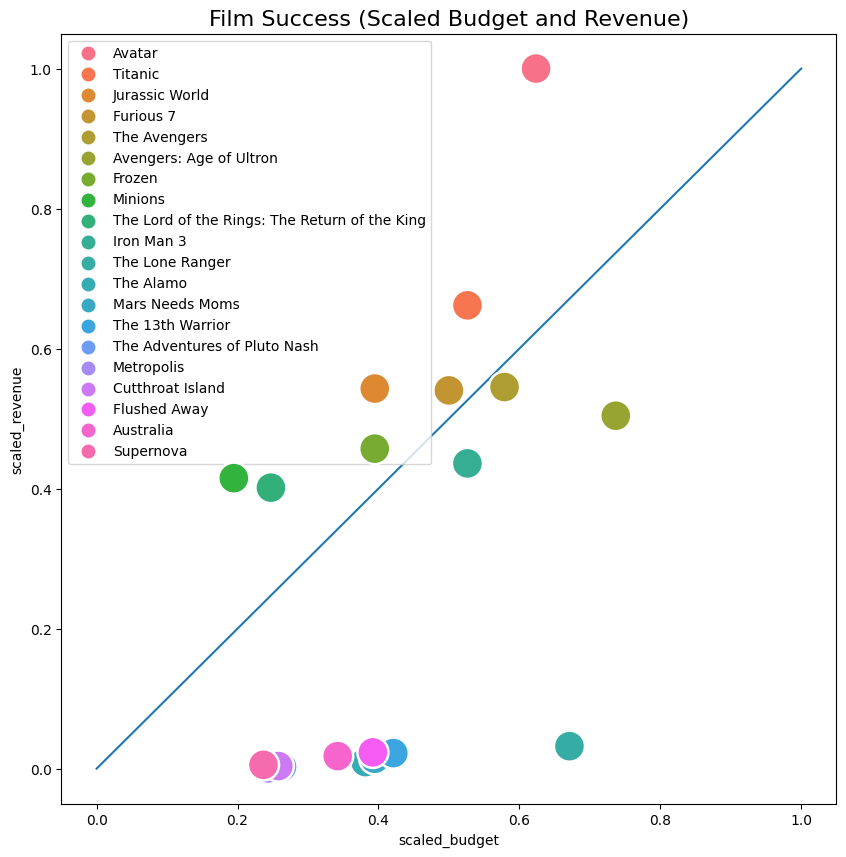

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(top_bottom_films, x="scaled_budget", y="scaled_revenue", hue = "title", s = 500, zorder = 100)
sns.lineplot(x = [0,1], y = [0,1])
#sns.lineplot(x = [0,1], y = [0.5,0.5])
#sns.lineplot(x = [0.5,0.5], y = [0,0.5])
plt.title("Film Success (Scaled Budget and Revenue)", size = 16)
plt.legend(markerscale = 1.5)

# Unable to get title labels, may look clustered. 
# Colours not great. Work on colour pallettes in future. 

In [33]:
top_bottom_films[["title", "profit"]].sort_values(by = "profit", ascending = True)

title      profit
13                                  The Lone Ranger  -165710090
338                                       The Alamo  -119180039
141                                 Mars Needs Moms  -111007242
208                                The 13th Warrior   -98301101
311                    The Adventures of Pluto Nash   -92896027
2638                                     Metropolis   -91969578
340                                Cutthroat Island   -87982678
142                                    Flushed Away   -84540684
192                                       Australia   -80445998
775                                       Supernova   -75171919
31                                       Iron Man 3  1015439994
329   The Lord of the Rings: The Return of the King  1024888979
546                                         Minions  1082730962
124                                          Frozen  1124219009
7                           Avengers: Age of Ultron  1125403694
16                                     The Avengers  1299557910
44                                        Furious 7  1316249360
28                                   Jurassic World  1363528810
25                                          Titanic  1645034188
0                                            Avatar  2550965087

In [34]:
# Show top 5 most profitable films and year.
bot_5_profit.loc[:,["title","year"]]

title  year
13                 The Lone Ranger  2013
338                      The Alamo  2004
141                Mars Needs Moms  2011
208               The 13th Warrior  1999
311   The Adventures of Pluto Nash  2002
2638                    Metropolis  1927
340               Cutthroat Island  1995
142                   Flushed Away  2006
192                      Australia  2008
775                      Supernova  2000

In [35]:
# Select by Popularity <7 and sort
popularity_high = movies_df.loc[movies_df["popularity"] >=7]
popularity_high.sort_values("popularity", inplace = True, ascending = True)
popularity_high

# 2708 Films,
# The Rose to Deadpool, Interstellar, Minions.

C:\Users\karlb\AppData\Local\Temp\ipykernel_10908\1016860989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_high.sort_values("popularity", inplace = True, ascending = True)


budget                                             genres      id  \
3212    9250000                      ['Drama', 'Music', 'Romance']   16323   
1905   25000000         ['Drama', 'Horror', 'Mystery', 'Thriller']   43931   
1939   25000000       ['Action', 'Adventure', 'Fantasy', 'Horror']  168705   
839    55000000                      ['History', 'Drama', 'Music']    8818   
340    98000000                            ['Action', 'Adventure']    1408   
...         ...                                                ...     ...   
127   150000000  ['Action', 'Adventure', 'Science Fiction', 'Th...   76341   
94    170000000         ['Action', 'Science Fiction', 'Adventure']  118340   
788    58000000                  ['Action', 'Adventure', 'Comedy']  293660   
95    165000000          ['Adventure', 'Drama', 'Science Fiction']  157336   
546    74000000     ['Family', 'Animation', 'Adventure', 'Comedy']  211672   

      popularity                               production_countries  \
3212    7.000949                       ['United States of America']   
1905    7.001176                       ['United States of America']   
1939    7.008216                       ['United States of America']   
839     7.027139            ['United States of America', 'Hungary']   
340     7.029308  ['France', 'Germany', 'Italy', 'United States ...   
...          ...                                                ...   
127   434.278564          ['Australia', 'United States of America']   
94    481.098624     ['United Kingdom', 'United States of America']   
788   514.569956                       ['United States of America']   
95    724.247784  ['Canada', 'United States of America', 'United...   
546   875.581305                       ['United States of America']   

     release_date     revenue  runtime          spoken_languages  \
3212   1979-11-07    29174648    125.0               ['English']   
1905   2010-10-08    19829957    107.0               ['English']   
1939   2005-10-22     2405420     95.0  ['English', 'Português']   
839    1996-12-14   141047179    134.0    ['English', 'Español']   
340    1995-12-22    10017322    119.0      ['English', 'Latin']   
...           ...         ...      ...                       ...   
127    2015-05-13   378858340    120.0               ['English']   
94     2014-07-30   773328629    121.0               ['English']   
788    2016-02-09   783112979    108.0               ['English']   
95     2014-11-05   675120017    169.0               ['English']   
546    2015-06-17  1156730962     91.0               ['English']   

                        title  ...  vote_count  date_parsed  year  \
3212                 The Rose  ...        28.0   1979-11-07  1979   
1905          My Soul to Take  ...       147.0   2010-10-08  2010   
1939               BloodRayne  ...       118.0   2005-10-22  2005   
839                     Evita  ...       120.0   1996-12-14  1996   
340          Cutthroat Island  ...       136.0   1995-12-22  1995   
...                       ...  ...         ...          ...   ...   
127        Mad Max: Fury Road  ...      9427.0   2015-05-13  2015   
94    Guardians of the Galaxy  ...      9742.0   2014-07-30  2014   
788                  Deadpool  ...     10995.0   2016-02-09  2016   
95               Interstellar  ...     10867.0   2014-11-05  2014   
546                   Minions  ...      4571.0   2015-06-17  2015   

      scaled_budget  scaled_revenue  scaled_popularity  scaled_runtime  \
3212       0.024342        0.010464           0.007973        0.282828   
1905       0.065789        0.007113           0.007973        0.222222   
1939       0.065789        0.000863           0.007981        0.181818   
839        0.144737        0.050591           0.008003        0.313131   
340        0.257895        0.003593           0.008006        0.262626   
...             ...             ...                ...             ...   
127        0.394737        0.135891           0.495977 

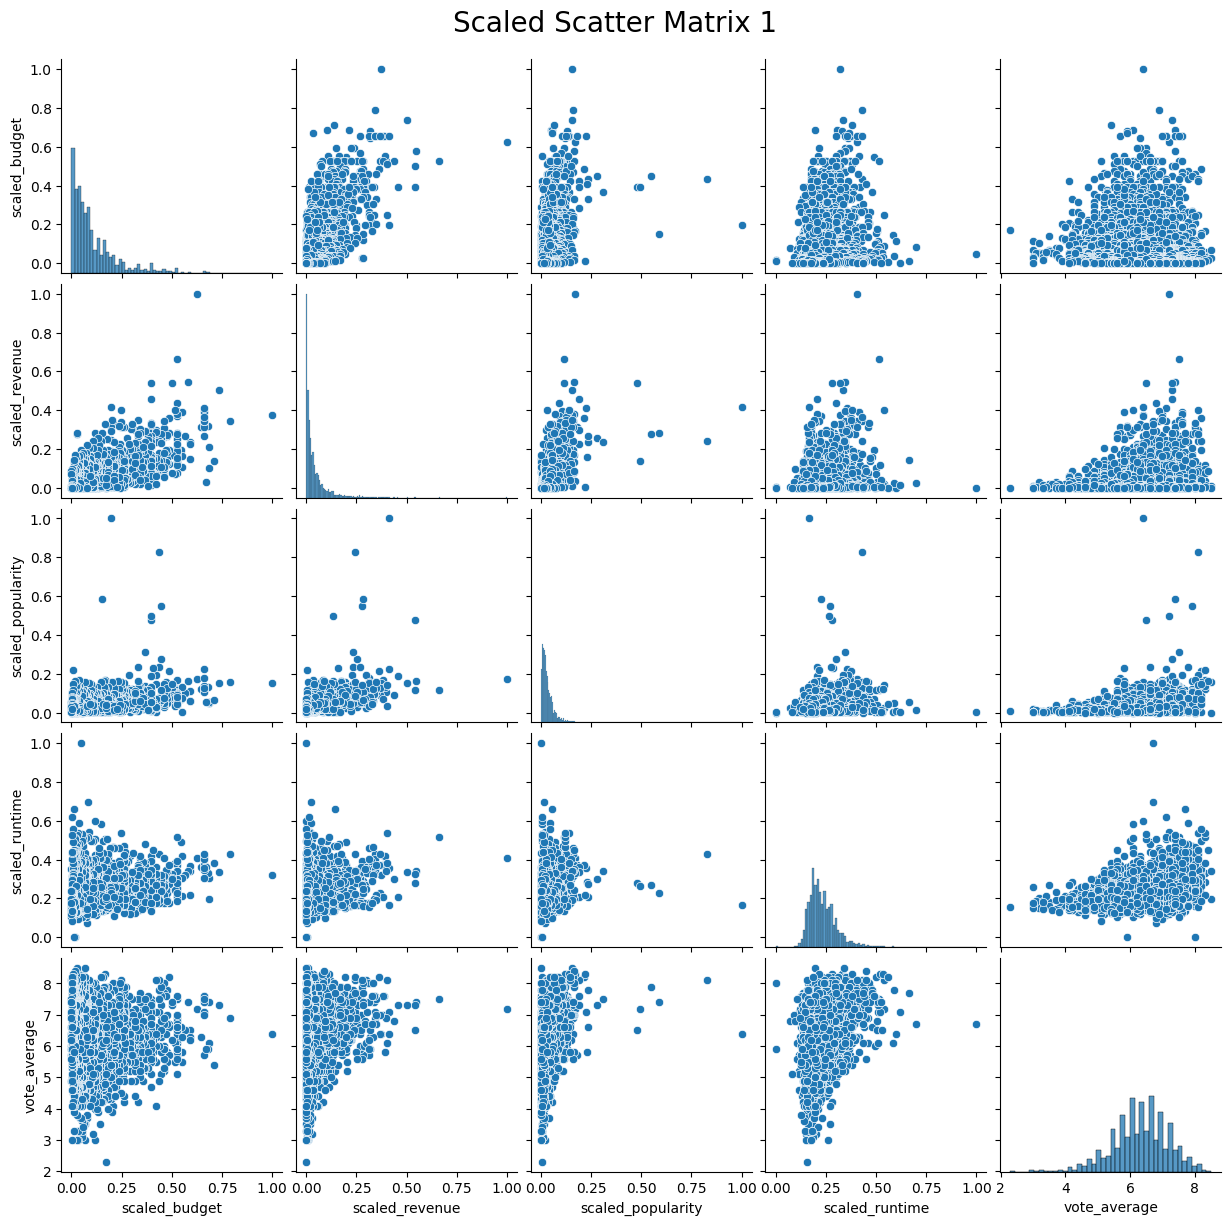

In [36]:
# All scaled Budget/Revenue/popularity/vote_average/year Pairplots
sns.pairplot(movies_df, vars = ["scaled_budget","scaled_revenue", 
                                "scaled_popularity","scaled_runtime","vote_average"])
plt.suptitle("Scaled Scatter Matrix 1", fontsize = 20)
plt.subplots_adjust(top=0.94)

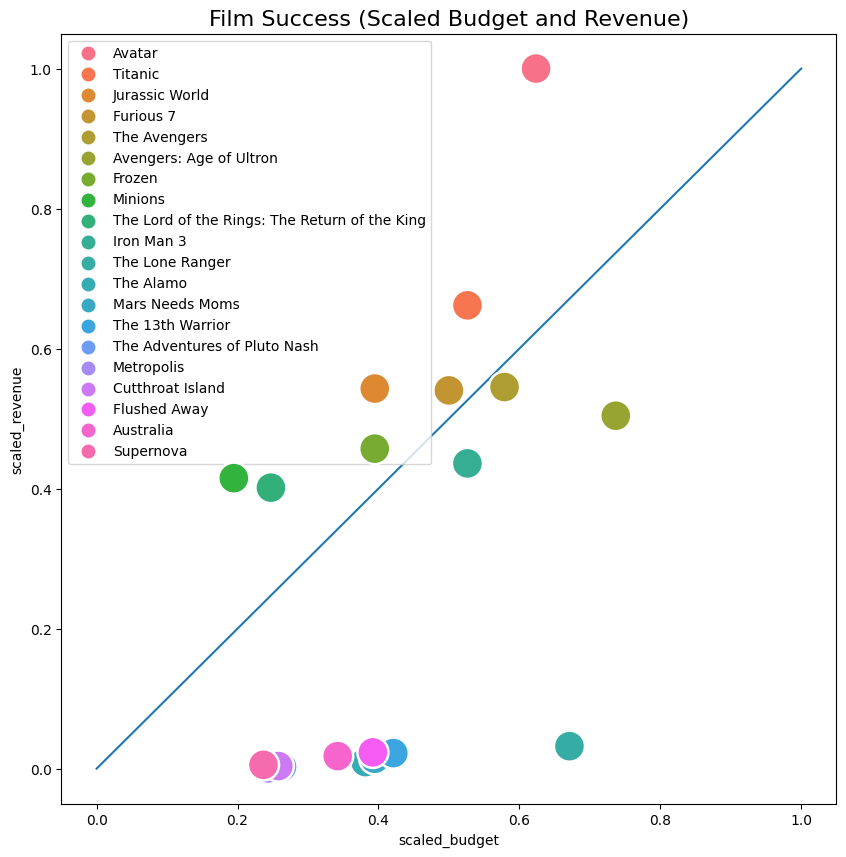

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(top_bottom_films, x="scaled_budget", y="scaled_revenue", hue = "title", s = 500, zorder = 100)
sns.lineplot(x = [0,1], y = [0,1])
#sns.lineplot(x = [0,1], y = [0.5,0.5])
#sns.lineplot(x = [0.5,0.5], y = [0,0.5])
plt.title("Film Success (Scaled Budget and Revenue)", size = 16)
plt.legend(markerscale = 1.5)

# Unable to get title labels, may look clustered. 
# Colours not great. Work on colour pallettes in future. 

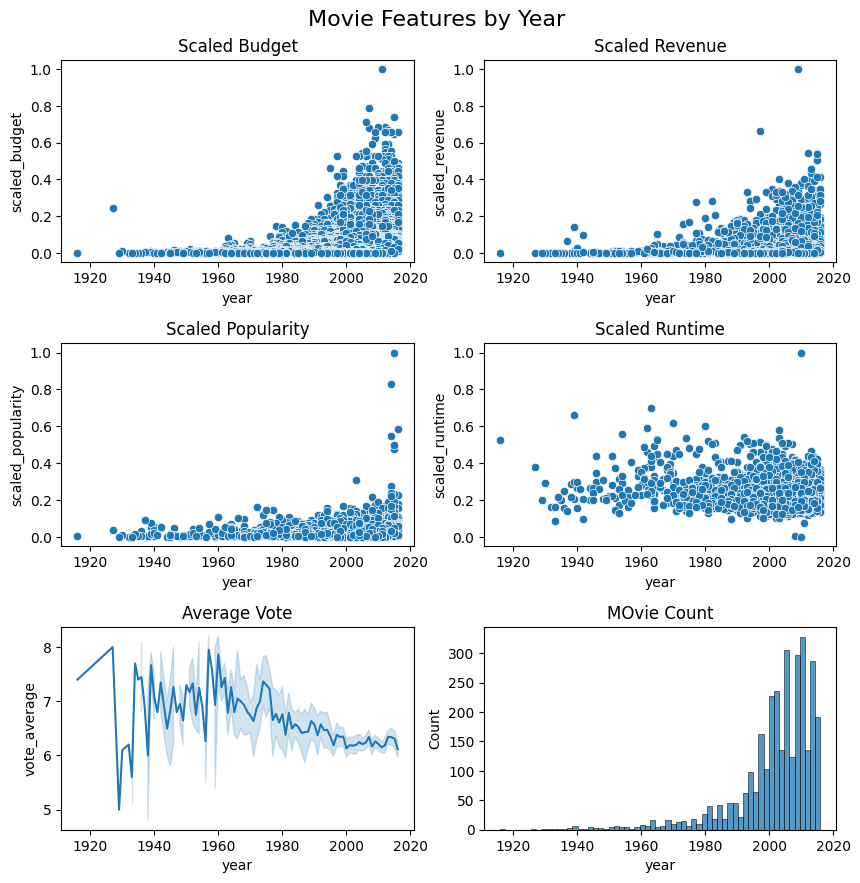

In [38]:
# Create a figure and specify the size
plt.figure(figsize = (10,10))
plt.subplots_adjust(hspace = 0.4)

# Create sup title
plt.suptitle("Movie Features by Year", size = 16, y = 0.93)

# Create the first subplot
plt.subplot(3, 2, 1)
sns.scatterplot(movies_df, x="year", y="scaled_budget")
plt.title("Scaled Budget")

# Create the second subplot
plt.subplot(3, 2, 2)
sns.scatterplot(movies_df, x="year", y="scaled_revenue")
plt.title("Scaled Revenue")

# Create the third subplot
plt.subplot(3, 2, 3)
sns.scatterplot(movies_df, x="year", y="scaled_popularity")
plt.title("Scaled Popularity")

# Create the fourth subplot
plt.subplot(3, 2, 4)
sns.scatterplot(movies_df, x="year", y="scaled_runtime")
plt.title("Scaled Runtime")

# Create the fifth subplot
plt.subplot(3, 2, 5)
sns.lineplot(movies_df, x="year", y="vote_average")
plt.title("Average Vote")

# Create the fifth subplot
plt.subplot(3, 2, 6)
sns.histplot(movies_df, x="year")
plt.title("MOvie Count")

plt.show()


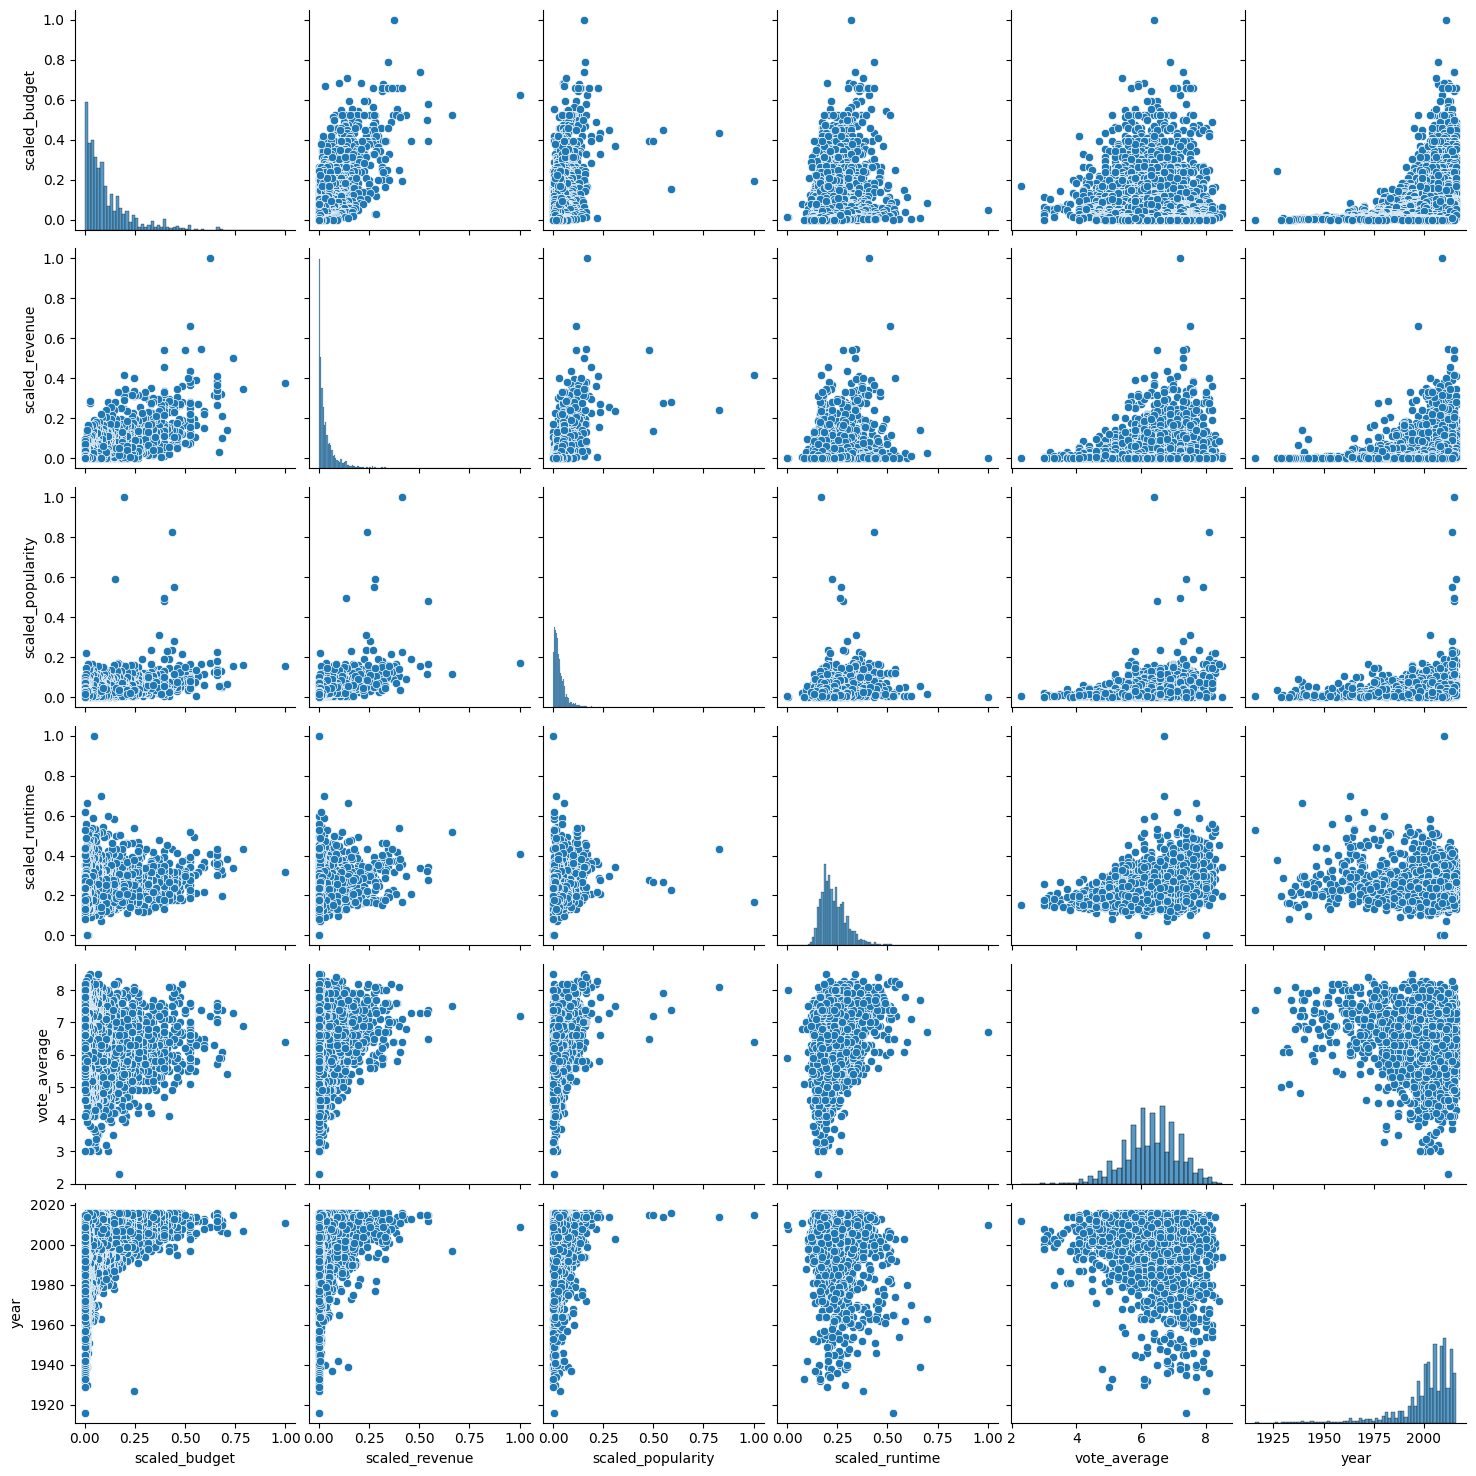

In [39]:
# All scaled Budget/Revenue/popularity/vote_average/year Pairplots
sns.pairplot(movies_df, vars = ["scaled_budget","scaled_revenue", 
                                "scaled_popularity","scaled_runtime","vote_average","year"])

In [40]:
# All normalised Budget/Revenue/popularity/vote_average/year Pairplots
#sns.pairplot(movies_df, vars = ["normalised_budget","normalised_revenue", 
#                                "normalised_popularity","runtime","vote_average","year"])

#### Scaled data sets look and feel better than those normalised. 

Relationships of interest.
1) budget, revenue, popularity vs year compared with runtime/year and vote average/year.
2) buget, revenue, popularity vs. vote average.
3) budget vs revenue.
4) budget films by year bin.
5) budget films by runtime bin.
6) budget by popularity. 
7) revenue by populalrity.

#### Other relationships to check

1) number of films per year or year bin. Need to get a sense of how heavy this data is.    
2) number of films per year on run bin. as above.
3) runtime vs. vote average.     

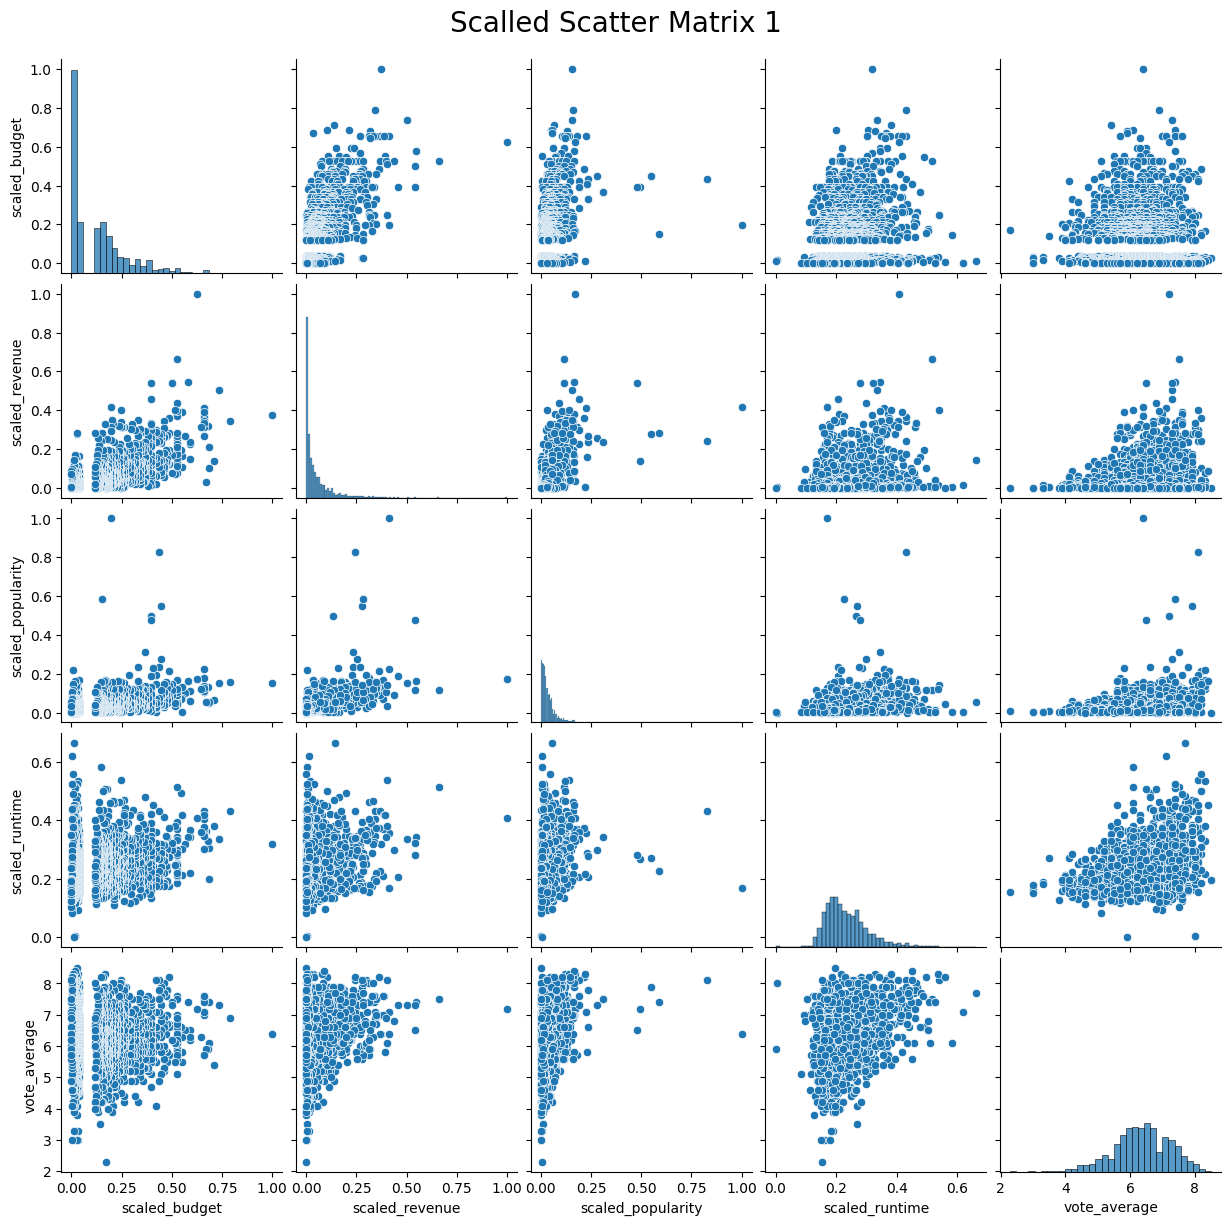

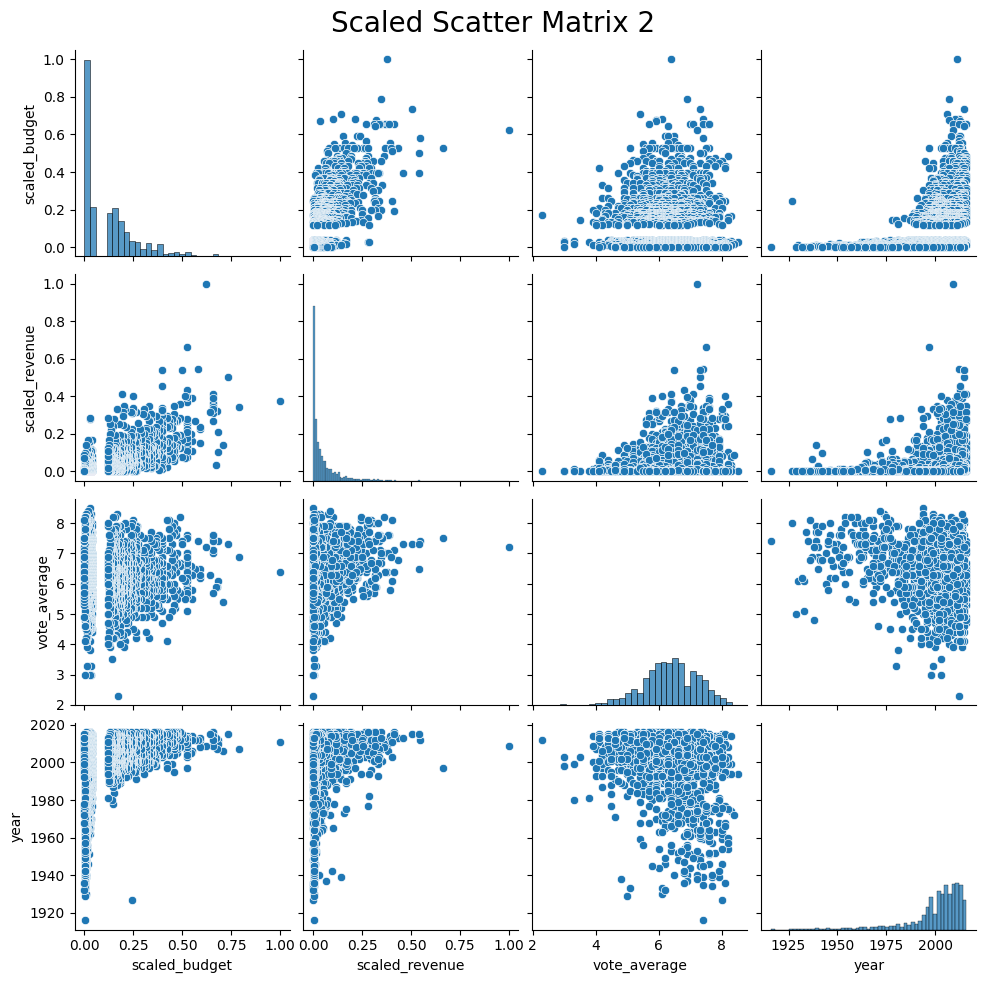

In [41]:
# Lets run the same with the top X and bottom X movies by revenue and compare
movies_df.sort_values("scaled_budget", inplace = True, ascending= False)

# Take top 100 expensive.
top_expensive = movies_df.head(1000)
#top_expensive = movies_df.loc[1000:2000]

# Take bottom 100 expensive.
bottom_expensive = movies_df.tail(1000)


# Combine top 100 and bottom 100
expensive_films = pd.concat([top_expensive, bottom_expensive])

# Filtered Budget/Revenue/popularity/vote_average/year Pairplots
# 1st (to see better)
sns.pairplot(expensive_films, vars = ["scaled_budget","scaled_revenue",
                                      "scaled_popularity", "scaled_runtime", "vote_average"])
plt.suptitle("Scalled Scatter Matrix 1", fontsize = 20)
plt.subplots_adjust(top=0.94)

# 2nd (to see better)
sns.pairplot(expensive_films, vars = ["scaled_budget","scaled_revenue",
                                      "vote_average","year"])
plt.suptitle("Scaled Scatter Matrix 2", fontsize = 20)
plt.subplots_adjust(top=0.94)

In [42]:
# Show Expensive films frame.
#expensive_films

In [43]:
# Take top XNo. expensive films.
top_expensive = movies_df.head(5)
#top_expensive

In [44]:
# Take bottom XNo. expensive/cheapest films.
bottom_expensive = movies_df.tail(5)
#bottom_expensive

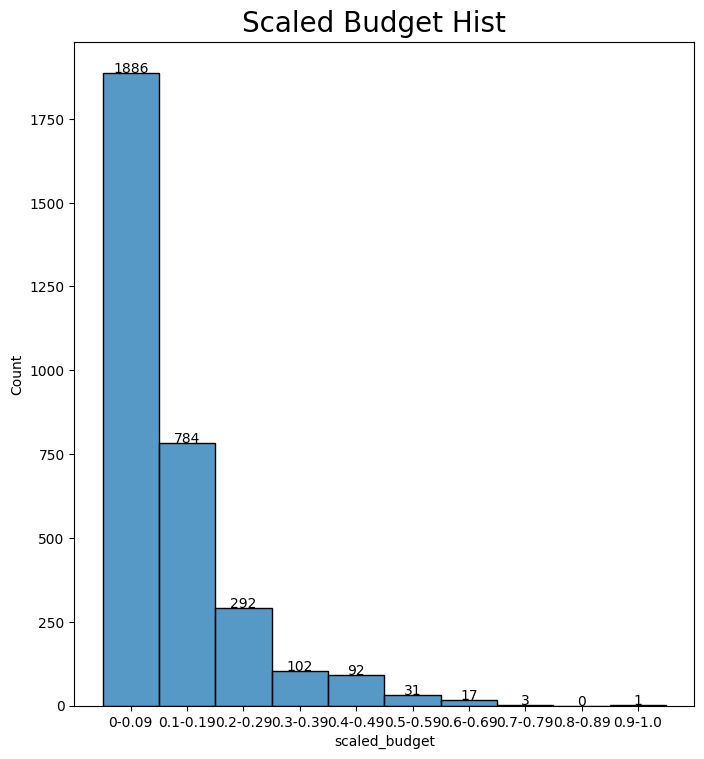

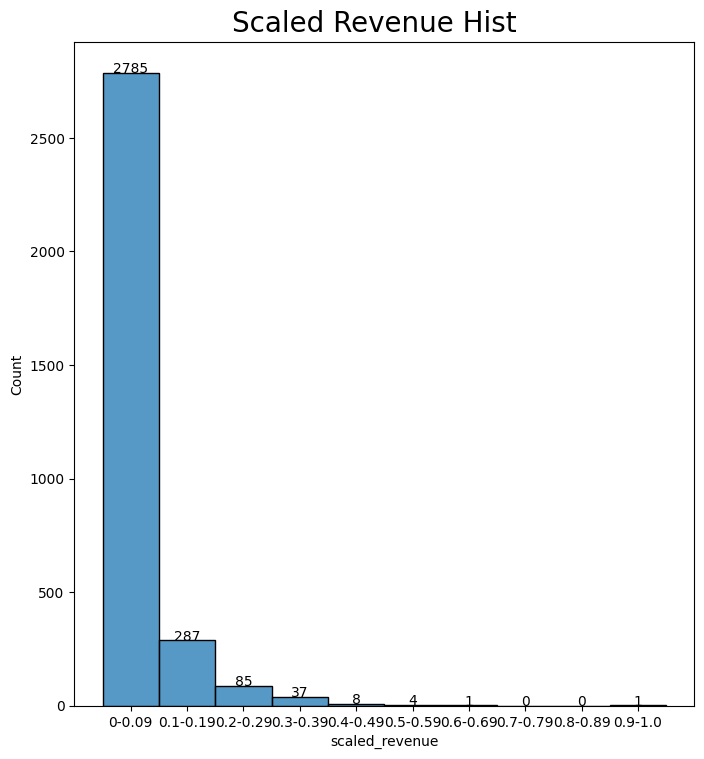

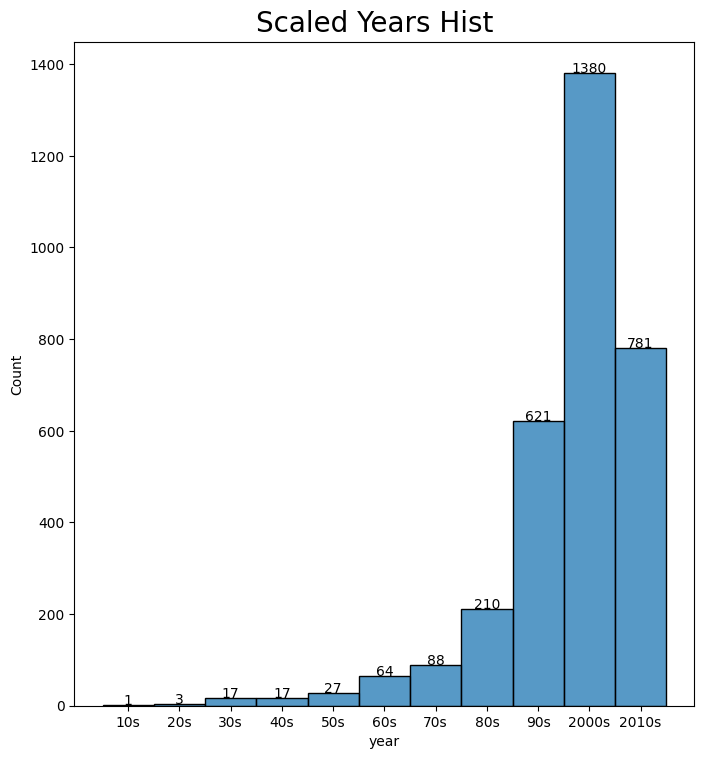

In [45]:
# group ages
year_group = pd.cut(movies_df['year'], [1910,1920, 1930,1940,1950, 1960, 1970, 1980, 
                                        1990, 2000, 2010, 2020], 
                   labels=['10s','20s','30s','40s','50s','60s','70s',
                           '80s','90s','2000s','2010s']);
movies_df["year_group"] = year_group

# group budgets
sbudget_group = pd.cut(movies_df['scaled_budget'], [0,0.09,0.19,0.29,0.39,0.49,0.59,
                                                    0.69,0.79,0.89,1],
                   labels=['0-0.09','0.1-0.19','0.2-0.29','0.3-0.39','0.4-0.49',
                           '0.5-0.59','0.6-0.69','0.7-0.79','0.8-0.89','0.9-1.0']);

# group revenues
srevenue_group = pd.cut(movies_df['scaled_revenue'], [0,0.09,0.19,0.29,0.39,0.49,0.59,
                                                    0.69,0.79,0.89,1],
                   labels=['0-0.09','0.1-0.19','0.2-0.29','0.3-0.39','0.4-0.49',
                           '0.5-0.59','0.6-0.69','0.7-0.79','0.8-0.89','0.9-1.0']);

# Create Histplot to budget bins.
fig = plt.figure(figsize=(8,8))
sns.histplot(data=movies_df, x= sbudget_group, label = "scaled_budget", legend = False)
plt.suptitle("Scaled Budget Hist", fontsize = 20)

#Show bar counts.
ax = fig.axes[0]
plt.subplots_adjust(top=0.94)
for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width()/2, patch.get_height()+1, 
            str(int(patch.get_height())), 
            ha='center')
    
# Create Histplot to show revenue bins.
fig = plt.figure(figsize=(8,8))
sns.histplot(data=movies_df, x= srevenue_group, label = "scaled_revenue", legend = False)
plt.suptitle("Scaled Revenue Hist", fontsize = 20)
plt.subplots_adjust(top=0.94)

#Show bar counts.
ax = fig.axes[0]
plt.subplots_adjust(top=0.94)
for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width()/2, patch.get_height()+1, 
            str(int(patch.get_height())), 
            ha='center')

# Create Histplot to show year bins.
fig = plt.figure(figsize=(8,8))
sns.histplot(data=movies_df, x= year_group, label = "year", legend = False)
plt.suptitle("Scaled Years Hist", fontsize = 20)
plt.subplots_adjust(top=0.94)

#Show bar counts.
ax = fig.axes[0]
plt.subplots_adjust(top=0.94)
for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width()/2, patch.get_height()+1, 
            str(int(patch.get_height())), 
            ha='center')

In [46]:
movies_df["scaled_budget"].head()

17    1.000000
1     0.789474
7     0.736842
10    0.710526
4     0.684211
Name: scaled_budget, dtype: float64

Text(0.5, 1.0, 'Movie Budget per Revenue (Scaled)')

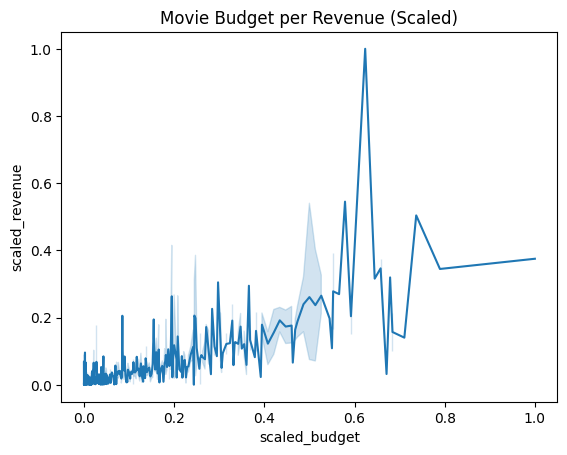

In [47]:
# Create line plot to look at Age/Parch.
sns.lineplot(data=movies_df, x = "scaled_budget", y = "scaled_revenue")
plt.title("Movie Budget per Revenue (Scaled)")

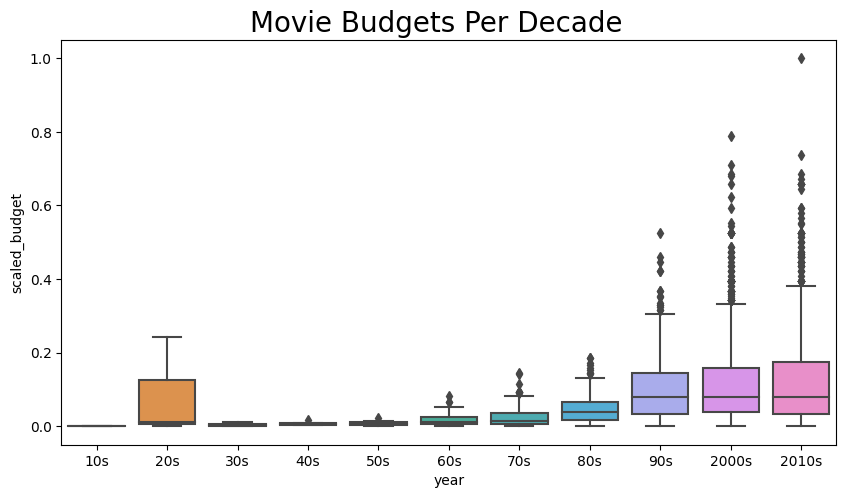

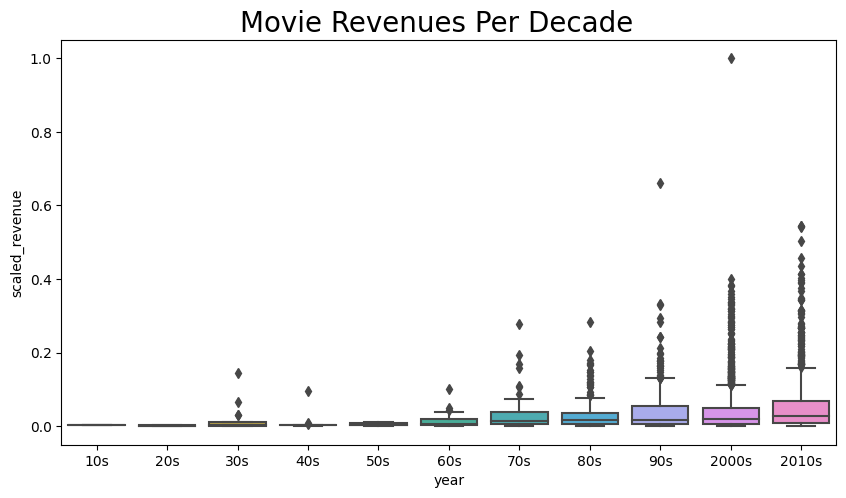

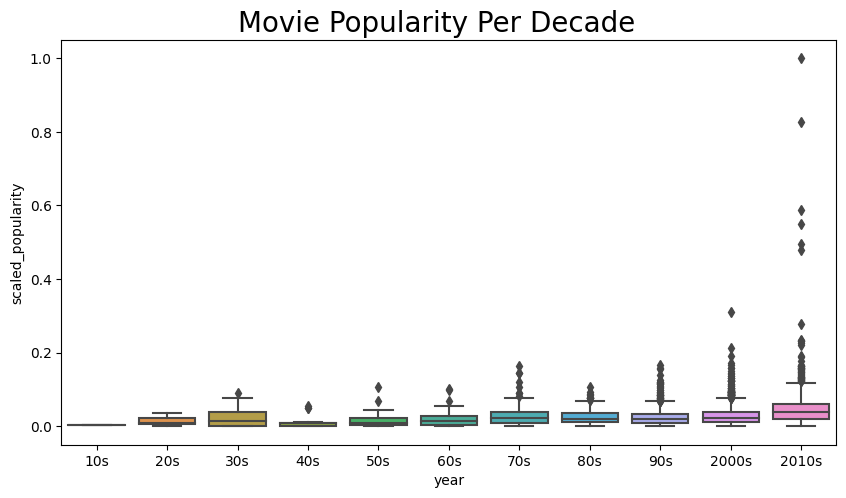

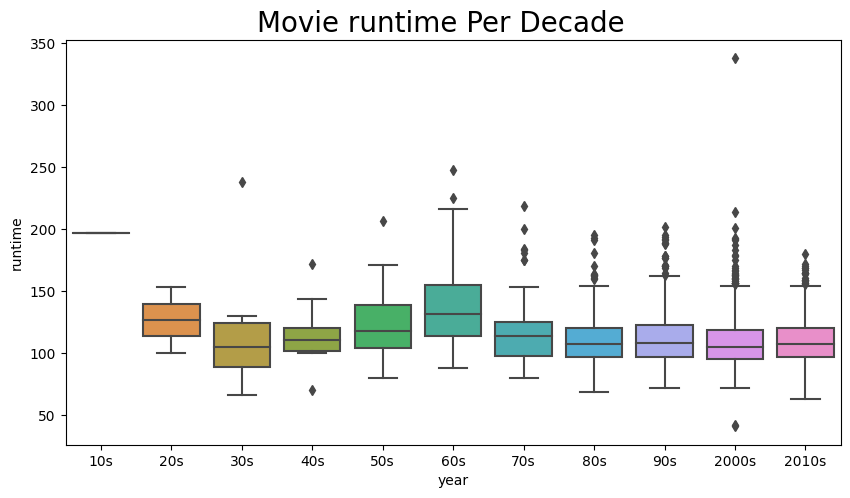

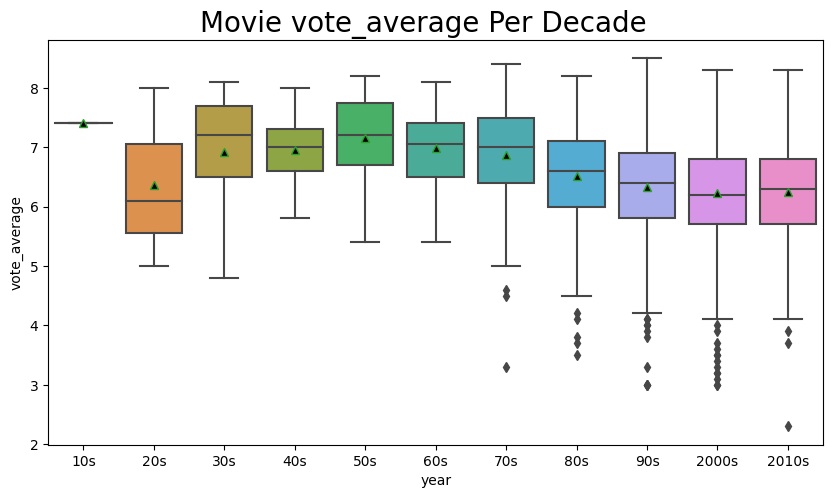

In [48]:
# Budget by year group.
plt.figure(figsize=(10,5))
sns.boxplot(movies_df, x = year_group, y = "scaled_budget")

plt.suptitle("Movie Budgets Per Decade", fontsize = 20)
plt.subplots_adjust(top=0.92)

plt.show()
plt.close()

# Revenue by year group
plt.figure(figsize=(10,5))
sns.boxplot(movies_df, x = year_group, y = "scaled_revenue")

plt.suptitle("Movie Revenues Per Decade", fontsize = 20)
plt.subplots_adjust(top=0.92)

plt.show()
plt.close()

# popularity by year group
plt.figure(figsize=(10,5))
sns.boxplot(movies_df, x = year_group, y = "scaled_popularity")

plt.suptitle("Movie Popularity Per Decade", fontsize = 20)
plt.subplots_adjust(top=0.92)

plt.show()
plt.close()

# runtime by year group
plt.figure(figsize=(10,5))
sns.boxplot(movies_df, x = year_group, y = "runtime")

plt.suptitle("Movie runtime Per Decade", fontsize = 20)
plt.subplots_adjust(top=0.92)

plt.show()
plt.close()

# vote_average by year group
plt.figure(figsize=(10,5))
sns.boxplot(movies_df, x = year_group, y = "vote_average",
            showmeans = True, 
            meanprops={"markerfacecolor":"black"})

plt.suptitle("Movie vote_average Per Decade", fontsize = 20)
plt.subplots_adjust(top=0.92)

plt.show()
plt.close()


In [49]:
movies_df.groupby('year_group').agg({'scaled_budget':'mean', 
                                     'scaled_revenue':'mean',
                                     'popularity':'mean',
                                     'runtime':'mean'})

scaled_budget  scaled_revenue  popularity     runtime
year_group                                                       
10s              0.001016        0.003011    3.232447  197.000000
20s              0.085043        0.001555   13.934838  126.666667
30s              0.003770        0.017852   21.334798  111.588235
40s              0.006073        0.008819   11.945603  114.764706
50s              0.007308        0.005890   17.065404  122.703704
60s              0.018358        0.013351   18.984960  139.000000
70s              0.027405        0.030455   28.347194  117.272727
80s              0.046359        0.032717   23.156084  111.438095
90s              0.101471        0.039280   22.611732  112.098229
2000s            0.116740        0.042696   25.436070  108.445652
2010s            0.136666        0.058904   44.691968  109.790013

In [50]:
movies_df.groupby('year_group').agg({'scaled_budget':'min', 
                                     'scaled_revenue':'min',
                                     'popularity':'min',
                                     'runtime':'min'})

scaled_budget  scaled_revenue  popularity  runtime
year_group                                                    
10s          1.015542e-03    3.011066e-03    3.232447    197.0
20s          9.973658e-04    2.332945e-04    0.968865    100.0
30s          0.000000e+00    7.173691e-09    0.483974     66.0
40s          2.257892e-03    1.060270e-03    0.181300     70.0
50s          5.526289e-04    9.750337e-05    0.835617     80.0
60s          2.999974e-04    5.332922e-06    0.178689     88.0
70s          2.631579e-08    2.152107e-09    0.132878     80.0
80s          4.210500e-04    1.272251e-04    0.146783     69.0
90s          1.578947e-08    0.000000e+00    0.037073     72.0
2000s        7.105263e-08    2.510792e-09    0.019984     41.0
2010s        2.368421e-08    2.152107e-09    0.097913     63.0

In [51]:
movies_df.groupby('year_group').agg({'scaled_budget':'max', 
                                     'scaled_revenue':'max',
                                     'popularity':'max',
                                     'runtime':'max'})

scaled_budget  scaled_revenue  popularity  runtime
year_group                                                    
10s              0.001016        0.003011    3.232447    197.0
20s              0.243737        0.002869   32.351527    153.0
30s              0.010526        0.143537   80.171283    238.0
40s              0.015789        0.095929   47.651878    172.0
50s              0.021711        0.012913   93.067866    207.0
60s              0.081882        0.102661   88.377076    248.0
70s              0.144737        0.278123  143.659698    219.0
80s              0.184211        0.284405   94.056131    195.0
90s              0.526316        0.661785  146.757391    202.0
2000s            0.789474        1.000000  271.972889    338.0
2010s            1.000000        0.545042  875.581305    180.0

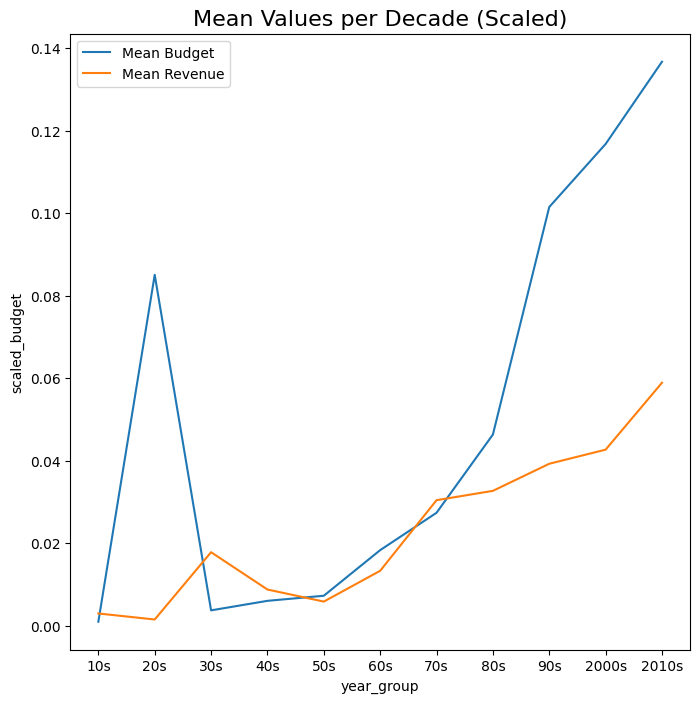

In [52]:
# Create mean scaled values per decade
mean_sbudget_per_year_group = movies_df.groupby("year_group")["scaled_budget"].mean()
mean_srevenue_per_year_group = movies_df.groupby("year_group")["scaled_revenue"].mean()
mean_spopularity_per_year_group = movies_df.groupby("year_group")["scaled_popularity"].mean()
mean_sruntime_per_year_group = movies_df.groupby("year_group")["scaled_runtime"].mean()
mean_svote_average_per_year_group = movies_df.groupby("year_group")["scaled_voteavg"].mean()
mean_sprofit_per_year_group = movies_df.groupby("year_group")["scaled_profit"].mean()


# Create Histplot to show year bins.
fig = plt.figure(figsize=(8,8))

sns.lineplot(mean_sbudget_per_year_group, label = "Mean Budget")
sns.lineplot(mean_srevenue_per_year_group, label = "Mean Revenue")
#sns.lineplot(mean_sprofit_per_year_group, label = "Mean Profit")
#sns.lineplot(mean_spopularity_per_year_group, label = "Mean Popularity")
#sns.lineplot(mean_sruntime_per_year_group, label = "Mean Runtime")
#sns.lineplot(mean_svote_average_per_year_group, label = "Mean Vote AVG")

# Customise Graph
plt.title("Mean Values per Decade (Scaled)", size = 16)
plt.legend(loc="upper left")

# Open/Close grpah
plt.show()
plt.close()


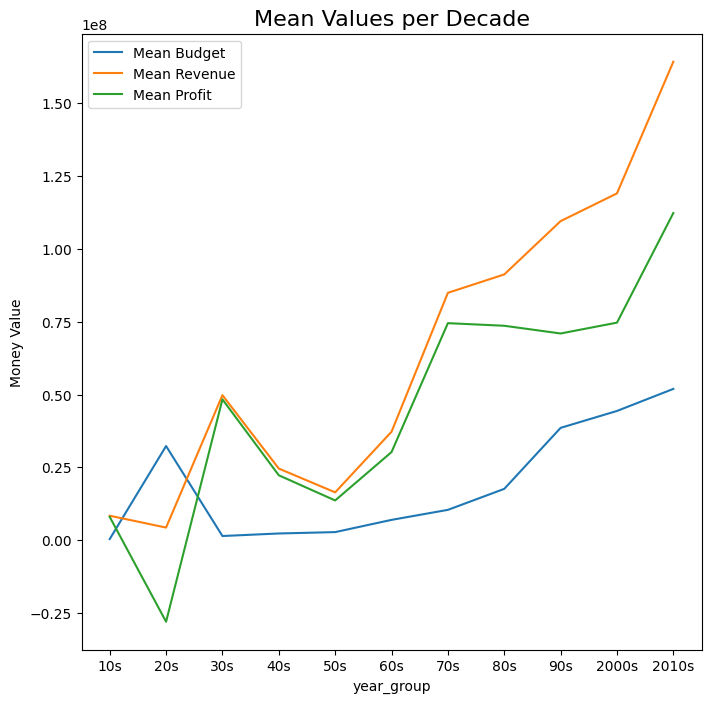

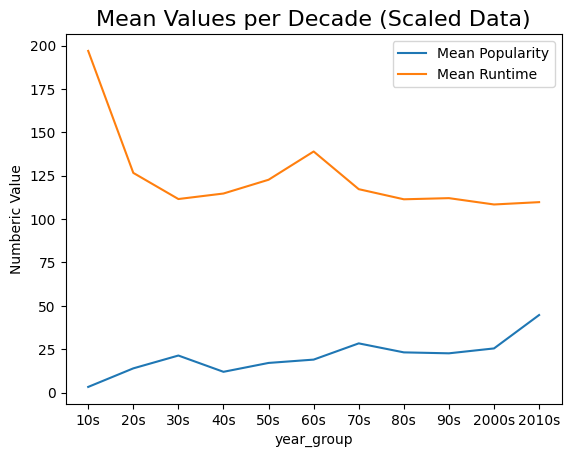

In [53]:
# Create Mean values per decade
mean_budget_per_year_group = movies_df.groupby("year_group")["budget"].mean()
mean_revenue_per_year_group = movies_df.groupby("year_group")["revenue"].mean()
mean_popularity_per_year_group = movies_df.groupby("year_group")["popularity"].mean()
mean_runtime_per_year_group = movies_df.groupby("year_group")["runtime"].mean()
mean_profit_per_year_group = movies_df.groupby("year_group")["profit"].mean()


# Create Histplot to show year bins.
fig = plt.figure(figsize=(8,8))

sns.lineplot(mean_budget_per_year_group, label = "Mean Budget")
sns.lineplot(mean_revenue_per_year_group, label = "Mean Revenue")
sns.lineplot(mean_profit_per_year_group, label = "Mean Profit")


# Customise Graph
plt.title("Mean Values per Decade", size = 16)
plt.ylabel("Money Value")
plt.legend(loc="upper left")

# Open/Close grpah
plt.show()
plt.close()

# Due to scaled, look at pop and runtime seperate
sns.lineplot(mean_popularity_per_year_group, label = "Mean Popularity")
sns.lineplot(mean_runtime_per_year_group, label = "Mean Runtime")

# Customise Graph
plt.title("Mean Values per Decade (Scaled Data)", size = 16)
plt.ylabel("Numberic Value")
plt.legend(loc="upper right")

# Open/Close grpah
plt.show()
plt.close()


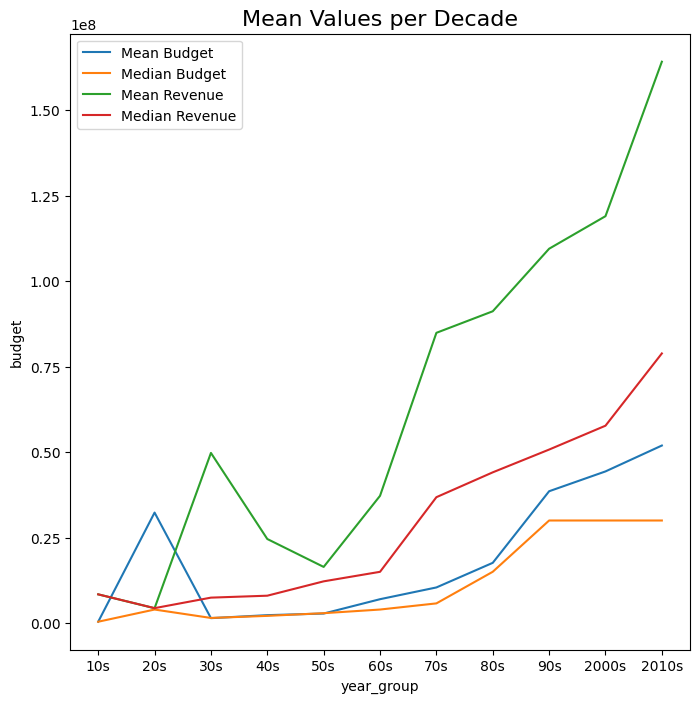

In [54]:
# medians, min and max by variable by decade
min_budget_per_year_group = movies_df.groupby("year_group")["budget"].min()
max_budget_per_year_group = movies_df.groupby("year_group")["budget"].max()
median_budget_per_year_group = movies_df.groupby("year_group")["budget"].median()
min_revenue_per_year_group = movies_df.groupby("year_group")["revenue"].min()
max_revenue_per_year_group = movies_df.groupby("year_group")["revenue"].max()
median_revenue_per_year_group = movies_df.groupby("year_group")["revenue"].median()


# Create Histplot to show year bins.
fig = plt.figure(figsize=(8,8))

# PLot variious lineplots by mean/median
sns.lineplot(mean_budget_per_year_group, label = "Mean Budget")
#sns.lineplot(min_budget_per_year_group, label = "Min Budget")
#sns.lineplot(max_budget_per_year_group, label = "Max Budget")
sns.lineplot(median_budget_per_year_group, label = "Median Budget")
sns.lineplot(mean_revenue_per_year_group, label = "Mean Revenue")
#sns.lineplot(min_revenue_per_year_group, label = "Min Revenue")
#sns.lineplot(max_revenue_per_year_group, label = "Max Revenue")
sns.lineplot(median_revenue_per_year_group, label = "Median Revenue")

# Customise Graph
plt.title("Mean Values per Decade", size = 16)
plt.legend(loc="upper left")

# Open/Close grpah
plt.show()
plt.close()


In [55]:
# Converting the genres column in a list.

movies_df['genres'] = movies_df['genres'].apply(eval)

# Separating the list into strings, using .explode(). And adjusting the indexes with .reset_index().

temp_movies_df = movies_df.explode('genres').reset_index(drop=True)

In [56]:
temp_movies_df

budget     genres     id  popularity          production_countries  \
0     380000000  Adventure   1865  135.413856  ['United States of America']   
1     380000000     Action   1865  135.413856  ['United States of America']   
2     380000000    Fantasy   1865  135.413856  ['United States of America']   
3     300000000  Adventure    285  139.082615  ['United States of America']   
4     300000000    Fantasy    285  139.082615  ['United States of America']   
...         ...        ...    ...         ...                           ...   
8511          4      Drama  22649    1.199451  ['United States of America']   
8512          4    Romance  22649    1.199451  ['United States of America']   
8513          4        War  22649    1.199451  ['United States of America']   
8514          1      Drama   3082   28.276480  ['United States of America']   
8515          1     Comedy   3082   28.276480  ['United States of America']   

     release_date     revenue  runtime        spoken_languages  \
0      2011-05-14  1045713802    136.0  ['English', 'Español']   
1      2011-05-14  1045713802    136.0  ['English', 'Español']   
2      2011-05-14  1045713802    136.0  ['English', 'Español']   
3      2007-05-19   961000000    169.0             ['English']   
4      2007-05-19   961000000    169.0             ['English']   
...           ...         ...      ...                     ...   
8511   1932-12-08          25     89.0             ['English']   
8512   1932-12-08          25     89.0             ['English']   
8513   1932-12-08          25     89.0             ['English']   
8514   1936-02-05     8500000     87.0             ['English']   
8515   1936-02-05     8500000     87.0             ['English']   

                                            title  ...  date_parsed  year  \
0     Pirates of the Caribbean: On Stranger Tides  ...   2011-05-14  2011   
1     Pirates of the Caribbean: On Stranger Tides  ...   2011-05-14  2011   
2     Pirates of the Caribbean: On Stranger Tides  ...   2011-05-14  2011   
3        Pirates of the Caribbean: At World's End  ...   2007-05-19  2007   
4        Pirates of the Caribbean: At World's End  ...   2007-05-19  2007   
...                                           ...  ...          ...   ...   
8511                           A Farewell to Arms  ...   1932-12-08  1932   
8512                           A Farewell to Arms  ...   1932-12-08  1932   
8513                           A Farewell to Arms  ...   1932-12-08  1932   
8514                                 Modern Times  ...   1936-02-05  1936   
8515                                 Modern Times  ...   1936-02-05  1936   

     scaled_budget  scaled_revenue  scaled_popularity  scaled_runtime  \
0     1.000000e+00    3.750814e-01           0.154637        0.319865   
1     1.000000e+00    3.750814e-01           0.154637        0.319865   
2     1.000000e+00    3.750814e-01           0.154637        0.319865   
3     7.894737e-01    3.446959e-01           0.158827        0.430976   
4     7.894737e-01    3.446959e-01           0.158827        0.430976   
...            ...             ...                ...             ...   
8511  7.894737e-09    7.173691e-09           0.001347        0.161616   
8512  7.894737e-09    7.173691e-09           0.001347        0.161616   
8513  7.894737e-09    7.173691e-09           0.001347        0.161616   
8514  0.000000e+00    3.048817e-03           0.032272        0.154882   
8515  0.000000e+00    3.048817e-03           0.032272        0.154882   

      scaled_voteavg     profit  scaled_profit  year_group  
0           0.661290  665713802       0.306045       2010s  
1           0.661290  665713802       0.306045       2010s  
2           0.661290  665713802       0.306045       2010s  
3           0.741935  661000000       0.304310       2000s  
4           0.741935  661000000       0.304310       2000s  
...              ...        ...            ...         ...  
8511        0.629032         21       

In [57]:
temp_movies_df["genres"].value_counts()

Drama              1431
Comedy             1101
Thriller            933
Action              915
Adventure           658
Romance             569
Crime               520
Science Fiction     430
Family              363
Fantasy             341
Horror              332
Mystery             265
Animation           186
History             145
War                 119
Music               111
Western              57
Documentary          36
Foreign               4
Name: genres, dtype: int64

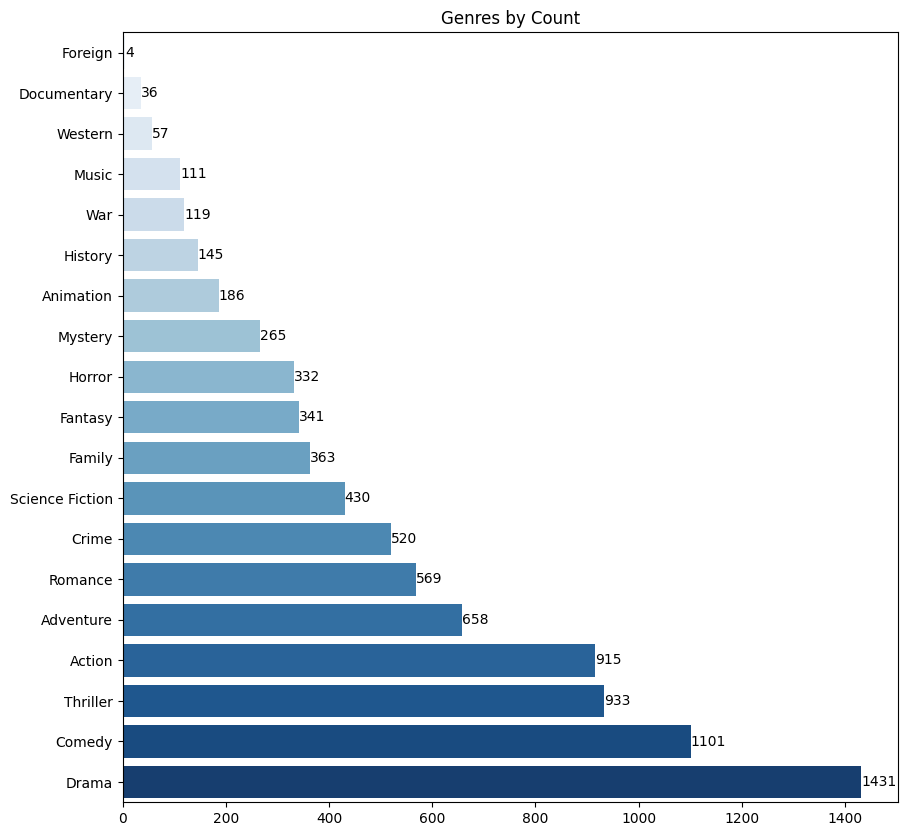

In [58]:
# Sort data count by genres to ascending order.
sorted_genres = temp_movies_df["genres"].value_counts().sort_values(ascending=True)

# Bar plot of Genres for each Movie (modified code from above)
plt.figure(figsize = (10,10))
ax = sns.barplot(x=sorted_genres.values, y=sorted_genres.index, orient='h',palette="Blues")

# Customise plot
plt.title("Genres by Count")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

# Show plot
plt.show()
plt.close()

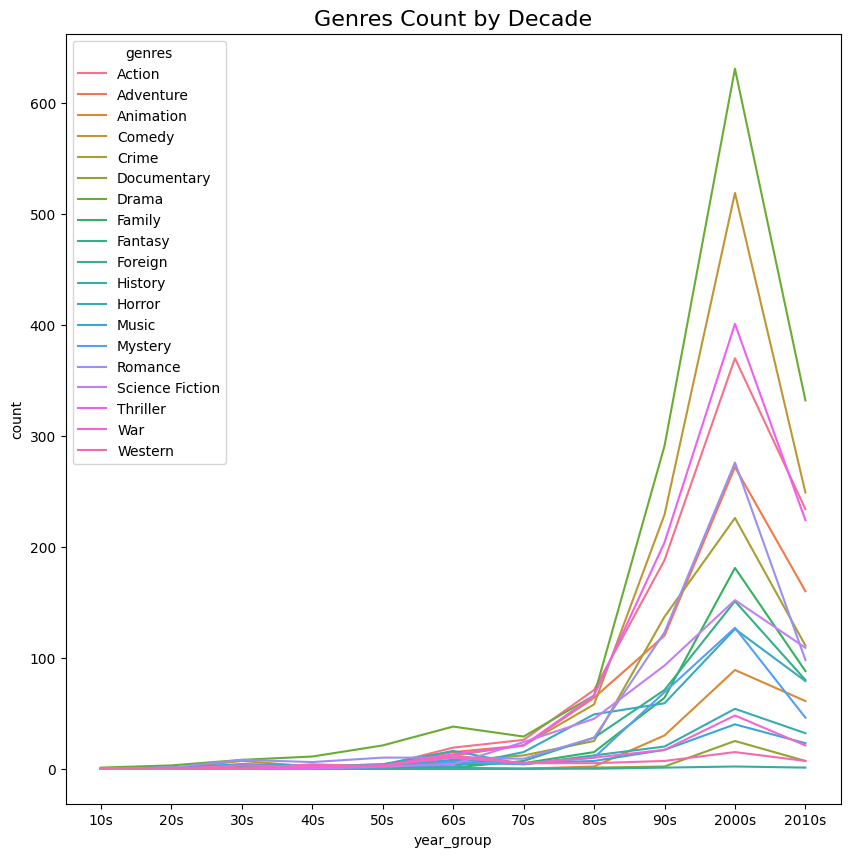

In [59]:
# Groupby 'year_group' and 'genres' and count film genres by decade.
genre_per_year_group = (temp_movies_df.groupby(["year_group","genres"])
                        .size().reset_index(name='count'))

# Create a line plot
plt.figure(figsize = (10,10))
sns.lineplot(genre_per_year_group,
             x='year_group', 
             y='count', 
             hue='genres')

# Customise plot
plt.title("Genres Count by Decade", size = 16)

# Show plot
plt.show()
plt.close()

# Need to look at better visual plot.

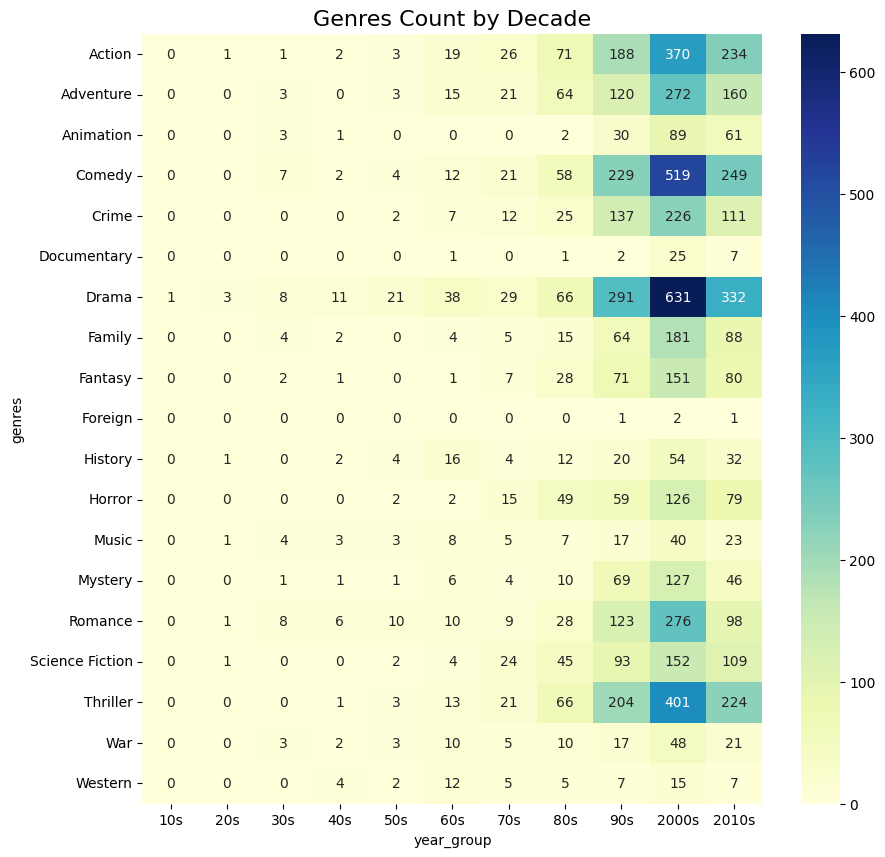

In [60]:
genre_per_year_group = (temp_movies_df.groupby(["year_group","genres"])
                        .size().reset_index(name='count'))

# Pivot the dataframe to create a heatmap
genre_per_year_group_pivot = genre_per_year_group.pivot_table(values='count', 
                                                             index='genres', 
                                                             columns='year_group')

# Create a heatmap
plt.figure(figsize = (10,10))
sns.heatmap(genre_per_year_group_pivot, annot= True, fmt = 'd', cmap='YlGnBu')

# Customize plot
plt.title("Genres Count by Decade", size = 16)

# Show plot
plt.show()
plt.close()


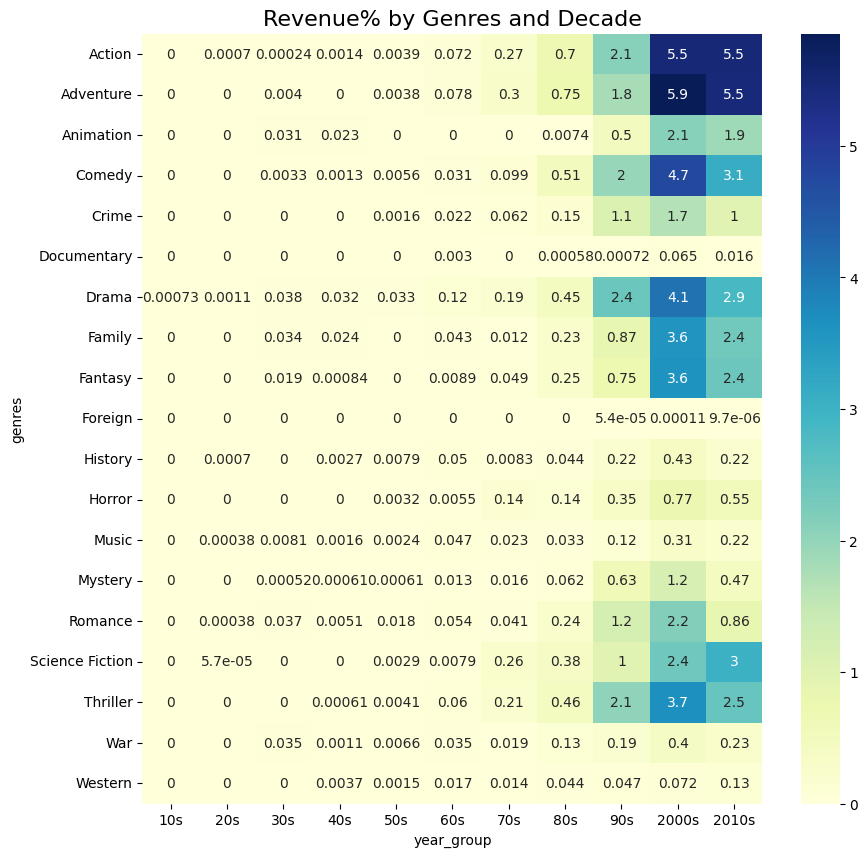

In [84]:
revenue_per_year_group_genres = (temp_movies_df.groupby(['year_group','genres'])
['scaled_revenue'].sum().reset_index())

# Get the total sum of scaled_revenue
total_scaled_revenue = revenue_per_year_group_genres['scaled_revenue'].sum()

# Divide each value by the total sum and multiply by 100 to get the percentage
revenue_per_year_group_genres['scaled_revenue'] = (revenue_per_year_group_genres['scaled_revenue']/
                                                   total_scaled_revenue)*100

revenue_heatmap = revenue_per_year_group_genres.pivot_table(values='scaled_revenue',
                                                            index='genres', 
                                                            columns='year_group')

plt.figure(figsize = (10,10))
sns.heatmap(revenue_heatmap, annot= True, cmap='YlGnBu')

# Customize plot
plt.title("Revenue% by Genres and Decade", size = 16)

# Show plot
plt.show()
plt.close()

    year_group           genres  vote_average
0          10s           Action           NaN
1          10s        Adventure           NaN
2          10s        Animation           NaN
3          10s           Comedy           NaN
4          10s            Crime           NaN
..         ...              ...           ...
204      2010s          Romance      6.467347
205      2010s  Science Fiction      6.330275
206      2010s         Thriller      6.123661
207      2010s              War      6.661905
208      2010s          Western      6.714286

[209 rows x 3 columns]


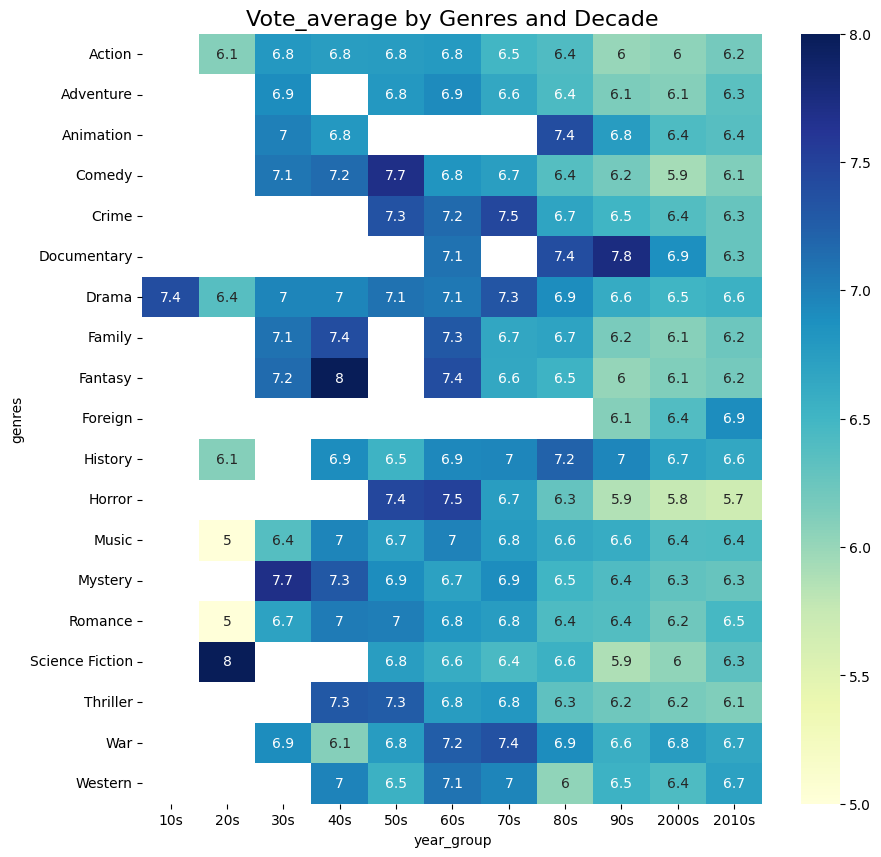

In [82]:
vote_average_per_year_group_genres = (temp_movies_df.groupby(['year_group','genres'])
                                      ['vote_average'].mean().reset_index())
print(vote_average_per_year_group_genres)

# Pivot the drataframe to create a heatmap
vote_average_heatmap = vote_average_per_year_group_genres.pivot_table(values='vote_average',
                                                                      index='genres', 
                                                                      columns='year_group')

plt.figure(figsize = (10,10))
sns.heatmap(vote_average_heatmap, annot= True, cmap='YlGnBu')

# Customize plot
plt.title("Vote_average by Genres and Decade", size = 16)

# Show plot
plt.show()
plt.close()

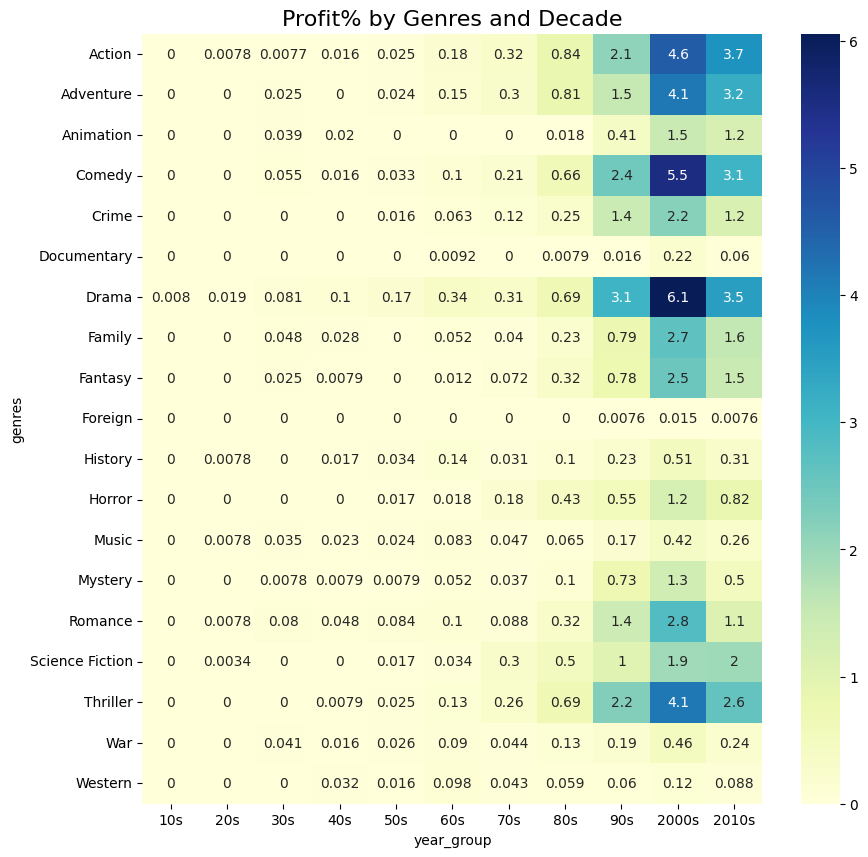

In [81]:
profit_per_year_group_genres = (temp_movies_df.groupby(['year_group','genres'])
                                ['scaled_profit'].sum().reset_index())

# Get the total sum of scaled_profit
total_scaled_profit = profit_per_year_group_genres['scaled_profit'].sum()

# Divide each value by the total sum and multiply by 100 to get the percentage
profit_per_year_group_genres['scaled_profit'] = (profit_per_year_group_genres['scaled_profit']/
                                                 total_scaled_profit)*100

profit_heatmap = profit_per_year_group_genres.pivot_table(values='scaled_profit',
                                                          index='genres', 
                                                          columns='year_group')

plt.figure(figsize = (10,10))
sns.heatmap(profit_heatmap, annot= True, cmap='YlGnBu')

# Customize plot
plt.title("Profit% by Genres and Decade", size = 16)

# Show plot
plt.show()
plt.close()


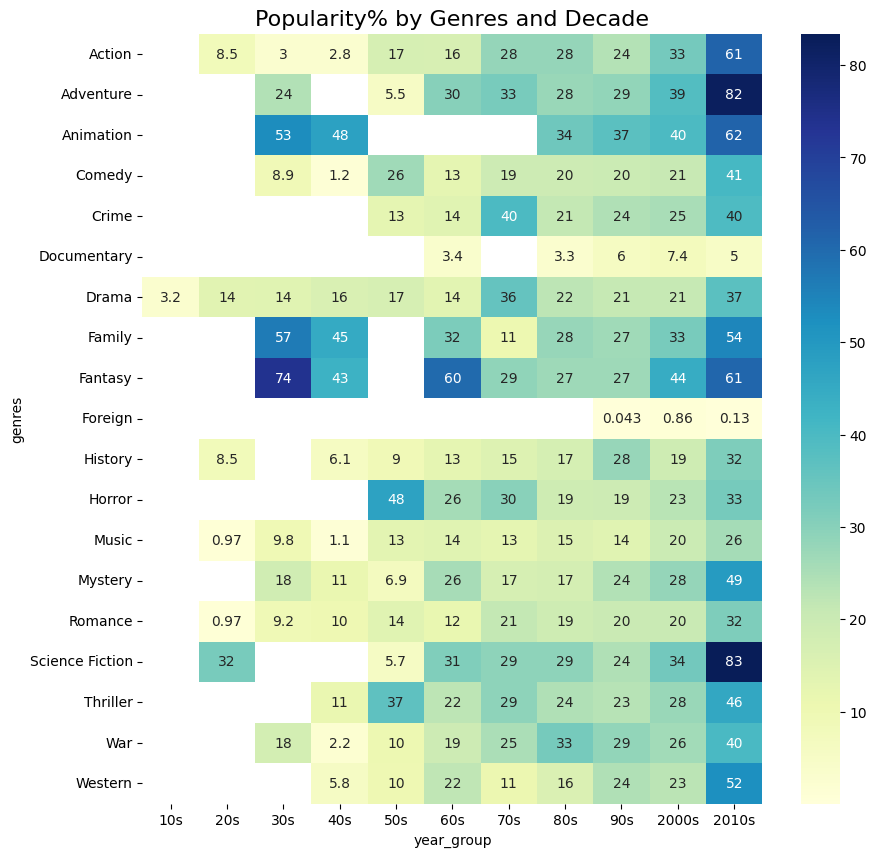

In [80]:
popularity_per_year_group_genres = (temp_movies_df.groupby(['year_group','genres'])
                                    ['popularity'].mean().reset_index())

# Pivot the drataframe to create a heatmap
popularity_heatmap = popularity_per_year_group_genres.pivot_table(values='popularity',
                                                                  index='genres', 
                                                                  columns='year_group')

plt.figure(figsize = (10,10))
sns.heatmap(popularity_heatmap, annot= True, cmap='YlGnBu')

# Customize plot
plt.title("Popularity% by Genres and Decade", size = 16)

# Show plot
plt.show()
plt.close()


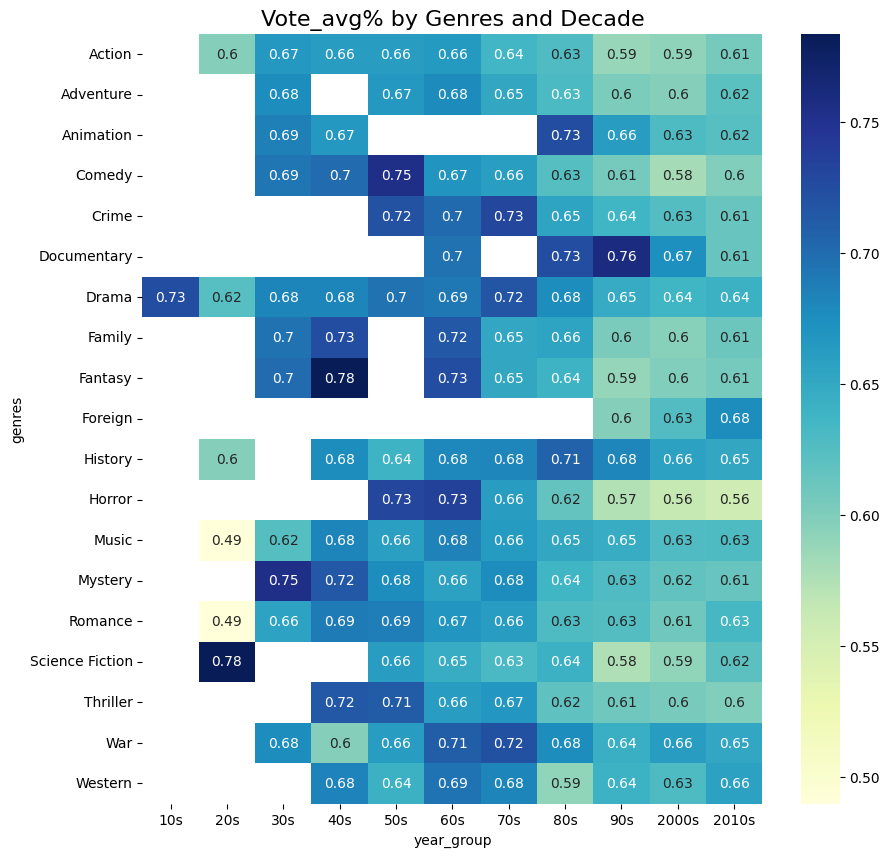

In [79]:
vote_per_year_group_genres = (temp_movies_df.groupby(['year_group','genres'])
                              ['vote_average'].mean().reset_index())

# Get the total sum of scaled_vote
total_scaled_vote = vote_per_year_group_genres['vote_average'].sum()

# Divide each value by the total sum and multiply by 100 to get the percentage
vote_per_year_group_genres['vote_average'] = (vote_per_year_group_genres['vote_average']
                                              /total_scaled_vote)*100

vote_heatmap = vote_per_year_group_genres.pivot_table(values='vote_average',
                                                      index='genres', 
                                                      columns='year_group')

plt.figure(figsize = (10,10))
sns.heatmap(vote_heatmap, annot= True, cmap='YlGnBu')

# Customize plot
plt.title("Vote_avg% by Genres and Decade", size = 16)

# Show plot
plt.show()
plt.close()


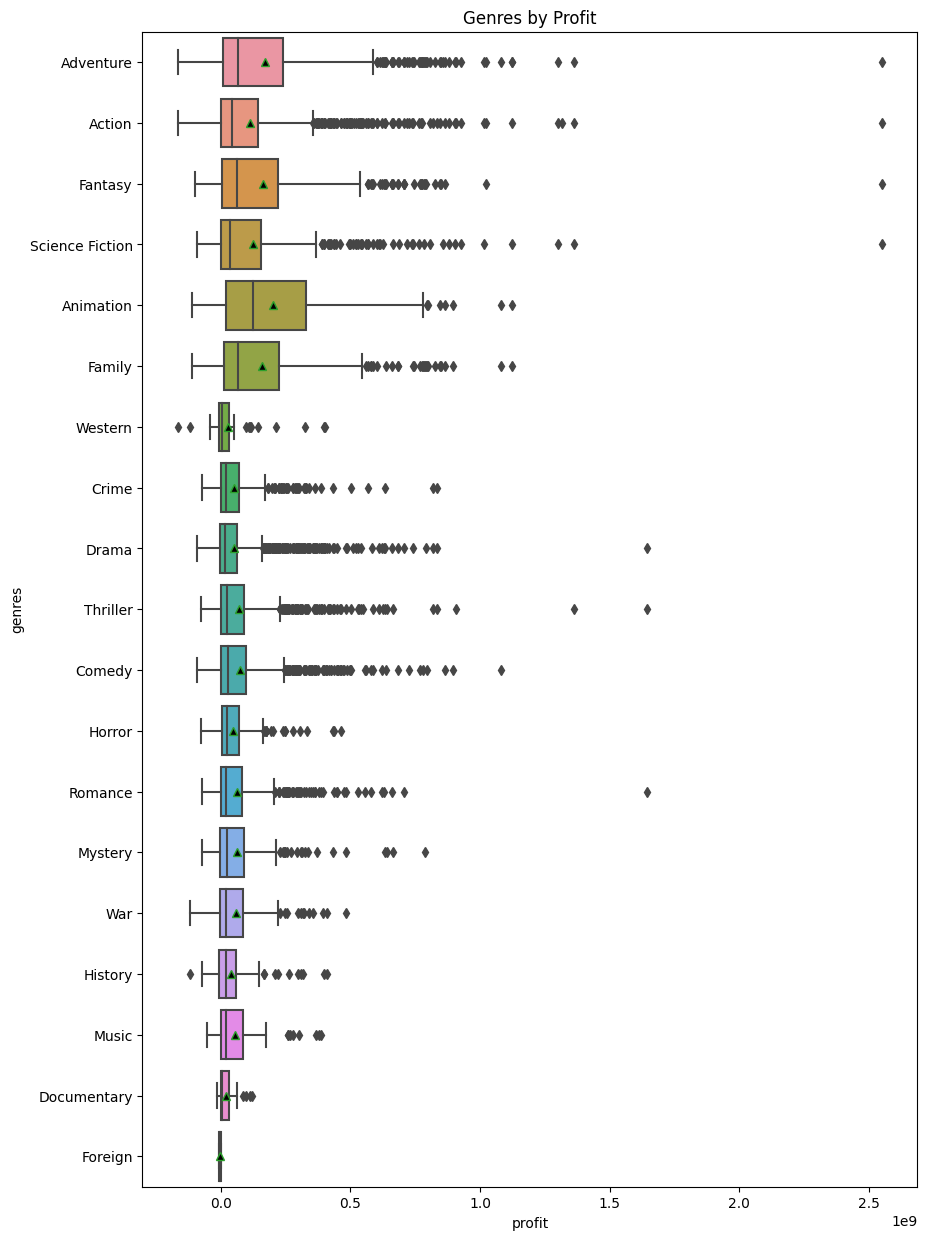

In [66]:
# Plot genre by revenue
plt.figure(figsize = (10,15))
ax = sns.boxplot(temp_movies_df,
                 y="genres", 
                 x="profit",
                 showmeans = True, 
                 meanprops={"markerfacecolor":"black"})

# Customise plot
plt.title("Genres by Profit")

# Show plot
plt.show()
plt.close()

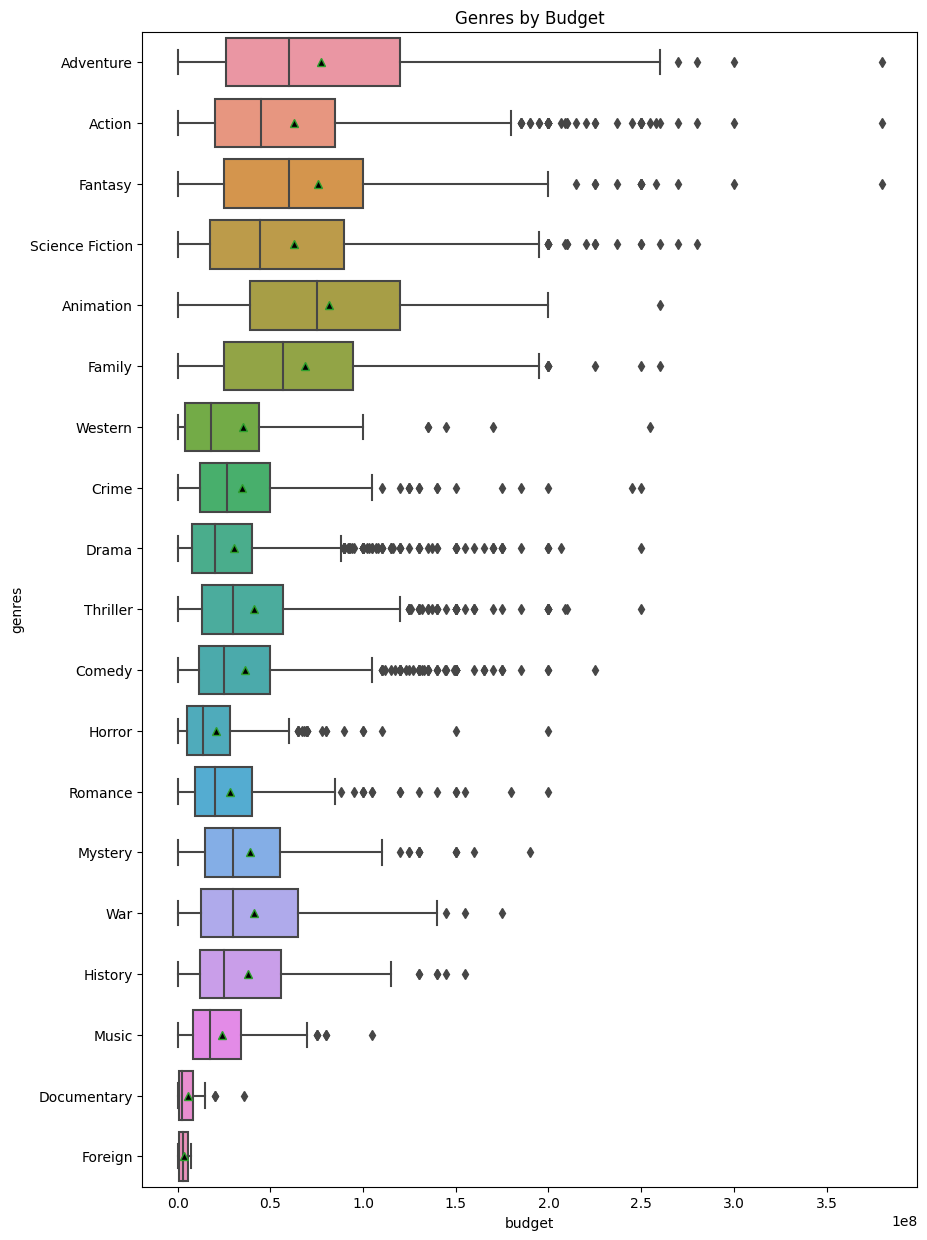

In [67]:
# Plot genre by budget
plt.figure(figsize = (10,15))
ax = sns.boxplot(temp_movies_df,
                 y="genres", 
                 x="budget",
                 showmeans = True, 
                 meanprops={"markerfacecolor":"black"})

# Customise plot
plt.title("Genres by Budget")

# Show plot
plt.show()
plt.close()

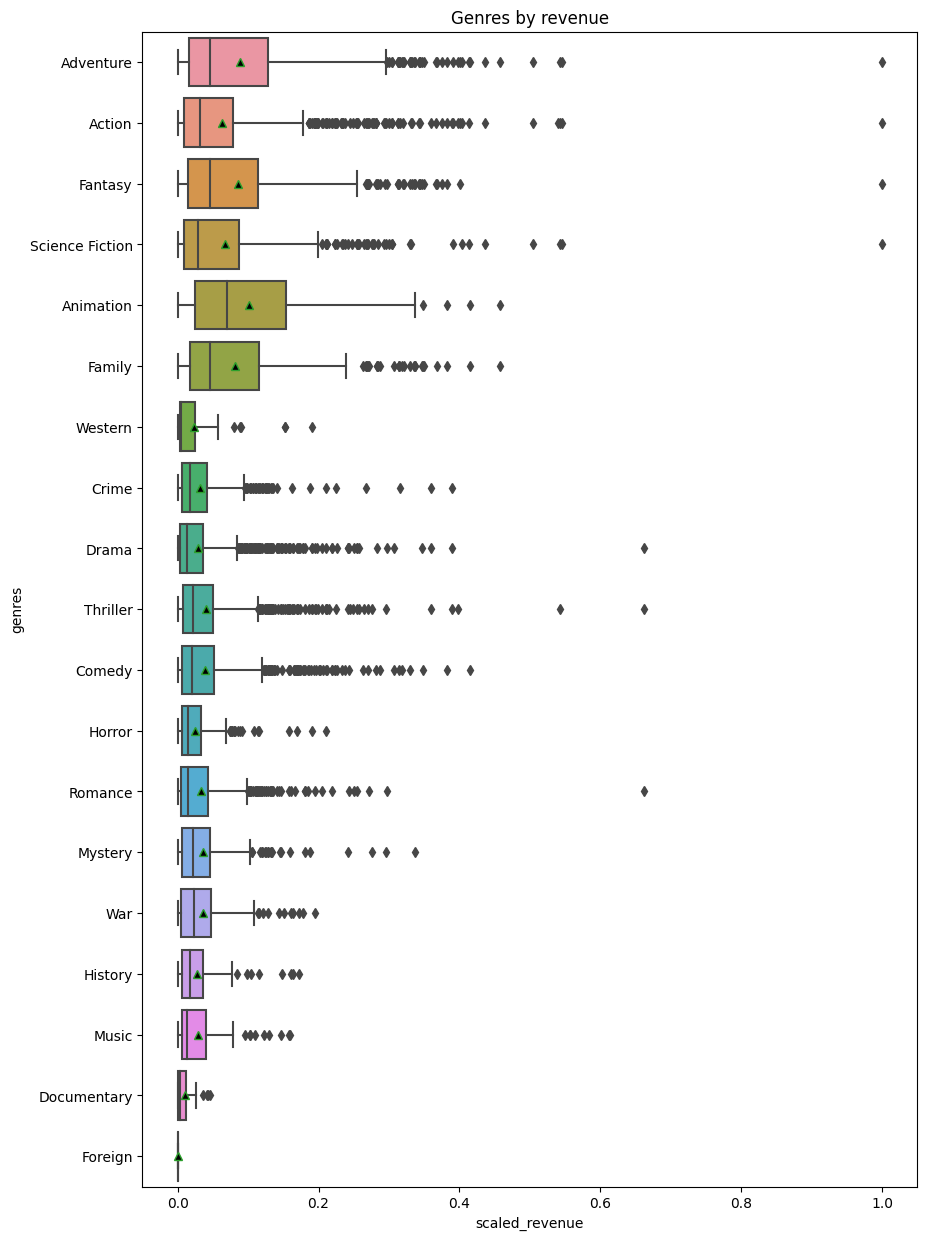

In [68]:
# Plot genre by popularity
plt.figure(figsize = (10,15))
ax = sns.boxplot(temp_movies_df,
                 y="genres", 
                 x="scaled_revenue",            
                 showmeans = True, 
                 meanprops={"markerfacecolor":"black"})

# Customise plot
plt.title("Genres by revenue")

# Show plot
plt.show()
plt.close()

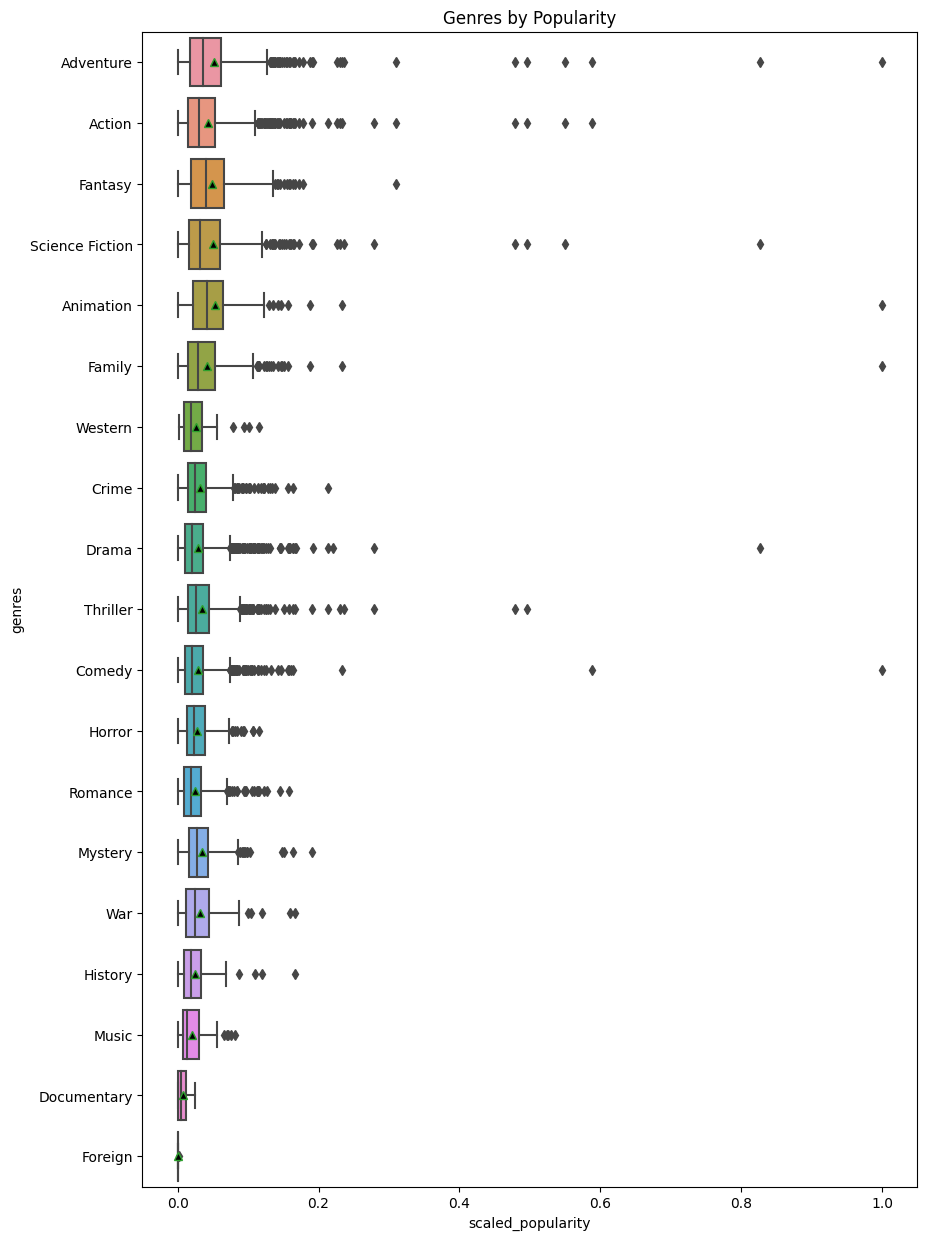

In [69]:
# Plot genre by popularity
plt.figure(figsize = (10,15))
ax = sns.boxplot(temp_movies_df,
                 y="genres", 
                 x="scaled_popularity",            
                 showmeans = True, 
                 meanprops={"markerfacecolor":"black"})

# Customise plot
plt.title("Genres by Popularity")

# Show plot
plt.show()
plt.close()

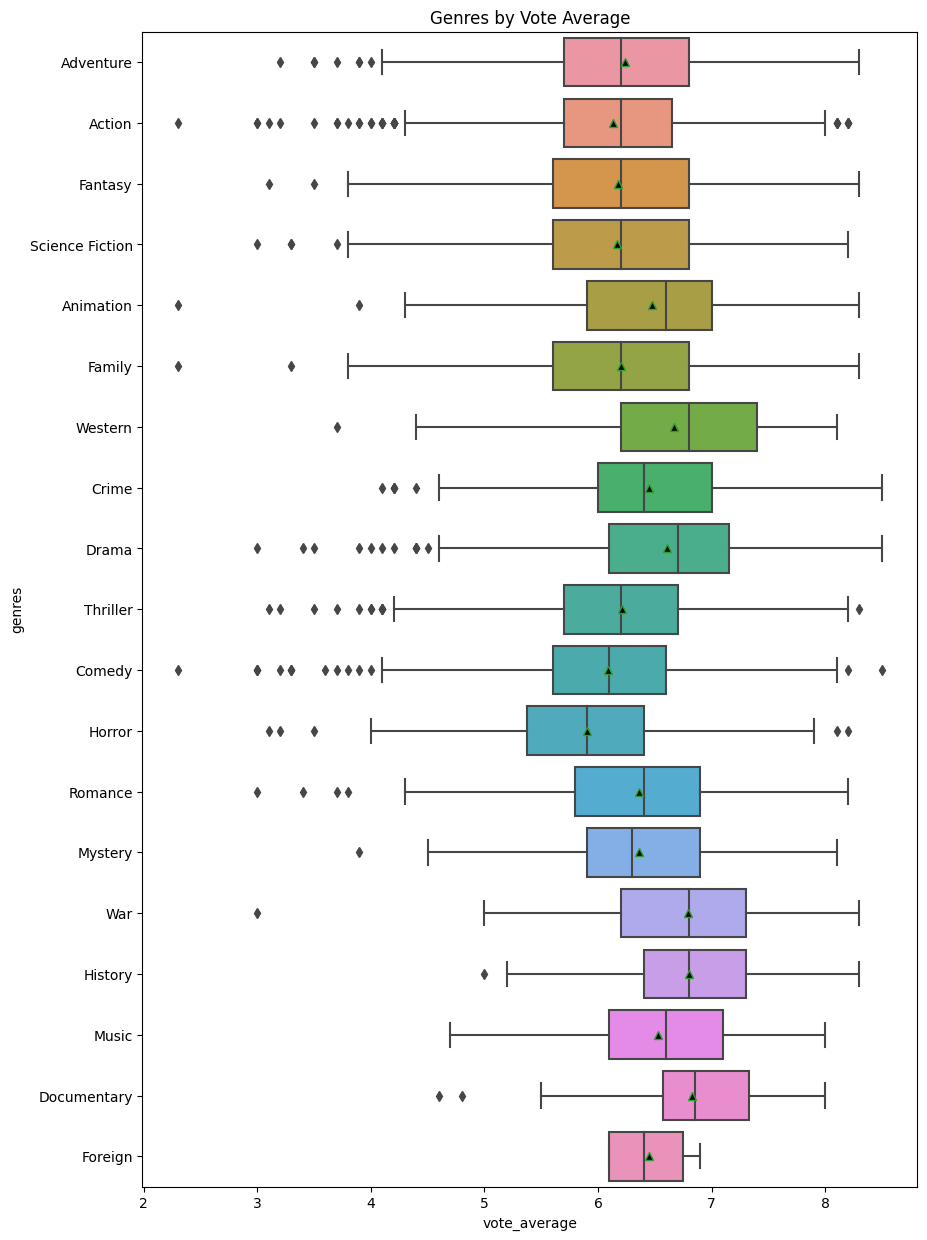

In [70]:
# Plot genre by vote
plt.figure(figsize = (10,15))
ax = sns.boxplot(temp_movies_df,
                 y="genres", 
                 x="vote_average",            
                 showmeans = True, 
                 meanprops={"markerfacecolor":"black"})

# Customise plot
plt.title("Genres by Vote Average")

# Show plot
plt.show()
plt.close()

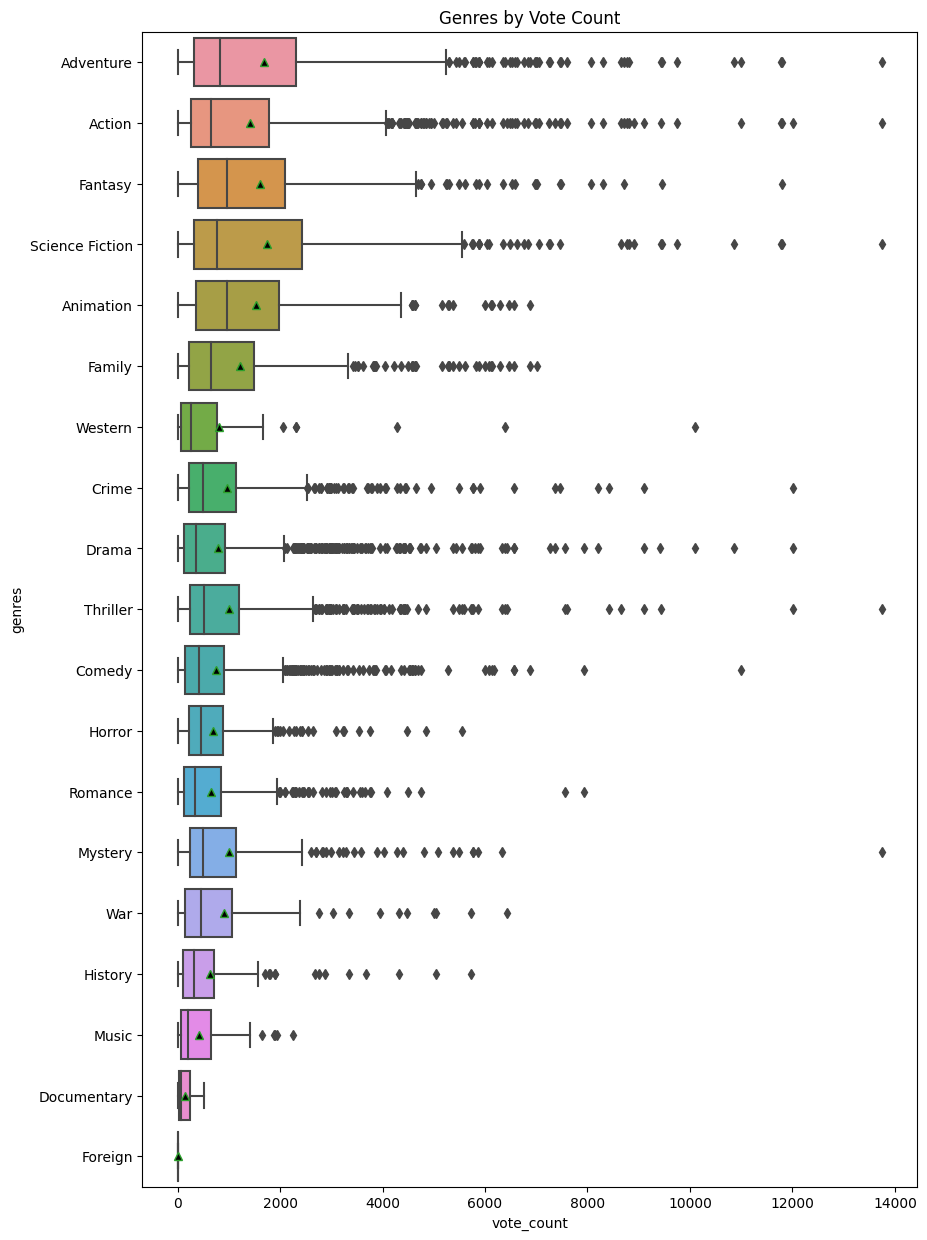

In [71]:
# Plot genre by vote_count
plt.figure(figsize = (10,15))
ax = sns.boxplot(temp_movies_df,
                 y="genres", 
                 x="vote_count",            
                 showmeans = True, 
                 meanprops={"markerfacecolor":"black"})

# Customise plot
plt.title("Genres by Vote Count")

# Show plot
plt.show()
plt.close()

In [72]:
#Get mean values.
genres_mean = temp_movies_df.groupby('genres').agg({'budget':'mean', 
                                     'revenue':'mean',
                                     'popularity':'mean',
                                     'vote_average':'mean',
                                     'scaled_runtime':'mean'})

# Create d bugdget/revenue (bure) difference
genres_mean['bure_difference'] = genres_mean['revenue'] - genres_mean['budget']

# Scale difference
scaled_data = minmax_scaling(genres_mean['bure_difference'],
                             columns = [0])


# Add scaled difference to dataframe.
genres_mean['scaled_bure_difference'] = scaled_data

# Show data table
genres_mean

C:\Users\karlb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


budget       revenue  popularity  vote_average  \
genres                                                                  
Action           6.253238e+07  1.773673e+08   37.341743      6.135410   
Adventure        7.716393e+07  2.487197e+08   45.669229      6.240881   
Animation        8.146463e+07  2.818781e+08   46.761626      6.477419   
Comedy           3.628161e+07  1.092791e+08   24.752022      6.091553   
Crime            3.481752e+07  8.807157e+07   28.012008      6.446538   
Documentary      5.654730e+06  2.720298e+07    6.627900      6.827778   
Drama            3.018725e+07  8.245365e+07   24.863199      6.605031   
Family           6.849928e+07  2.270545e+08   36.588854      6.200000   
Fantasy          7.578943e+07  2.389984e+08   43.023659      6.171261   
Foreign          3.306250e+06  4.939392e+05    0.470545      6.450000   
History          3.775487e+07  7.791728e+07   21.621106      6.800690   
Horror           2.055763e+07  6.772722e+07   24.662870      5.902410   
Music            2.396980e+07  7.906381e+07   17.907838      6.526126   
Mystery          3.876578e+07  1.020739e+08   29.925782      6.364151   
Romance          2.836149e+07  9.326498e+07   21.633122      6.356766   
Science Fiction  6.290199e+07  1.891964e+08   43.368129      6.165814   
Thriller         4.101878e+07  1.104038e+08   30.769275      6.207610   
War              4.132691e+07  1.014407e+08   27.999586      6.790756   
Western          3.548164e+07  6.577245e+07   23.072700      6.671930   

                 scaled_runtime  bure_difference  scaled_bure_difference  
genres                                                                    
Action                 0.242056     1.148349e+08                0.578899  
Adventure              0.244783     1.715558e+08                0.858002  
Animation              0.170197     2.004135e+08                1.000000  
Comedy                 0.204821     7.299752e+07                0.373032  
Crime                  0.240482     5.325406e+07                0.275882  
Documentary            0.203517     2.154825e+07                0.119869  
Drama                  0.258951     5.226639e+07                0.271022  
Family                 0.193913     1.585552e+08                0.794031  
Fantasy                0.230408     1.632089e+08                0.816930  
Foreign                0.228114    -2.812311e+06                0.000000  
History                0.335957     4.016241e+07                0.211463  
Horror                 0.197183     4.716959e+07                0.245943  
Music                  0.238906     5.509401e+07                0.284936  
Mystery                0.242234     6.330812e+07                0.325354  
Romance                0.239395     6.490349e+07                0.333205  
Science Fiction        0.232214     1.262944e+08                0.635287  
Thriller               0.234330     6.938506e+07                0.355257  
War                    0.311434     6.011382e+07                0.309636  
Western                0.276626     3.029081e+07                0.162888

Animation has the largest profitability (see scaled budget/revenue differnece)

Forign/Documenetary  and Westerns have the least profitability.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

##### Top 5 Most Expensive Films

1) Pirates of the Caribbean On Stranger Tides 
2) Priates of the Caribbean At World's End
3) Avengers: Age of Ultron
4) Superman Returns
5) John Carter. 

##### Bottom 5 Cheapest Films

1) Modern Times
2) A Farewell to Arms
3) Split Second
4) The Prophecy
5) Nurse 3D


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



There are 2708No. films with a popularity rating above '7.0'.

The first film with a popularity rating above '7.0' is 'The Rose'

The top 3no. most popular films is 'Deadpool', 'Interstellar', and 'Minions'.





#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

##### Top 5 Most Profitable Films (Revenue - Profit) with Year

1) Avatar  2009
2) Titanic 1997
3)  Jurasic World 2015
4)  Furious 7 2015
5) The Avengers 2012

##### Bottom 5 Least Profitable Films with Year

1) The Lone Ranger	2013
2) The Alam 2004
3) Mars Needs Moms 2011	
4) The 13th Warrior 1999
5) The Adventures of Pluto Nash 2002

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

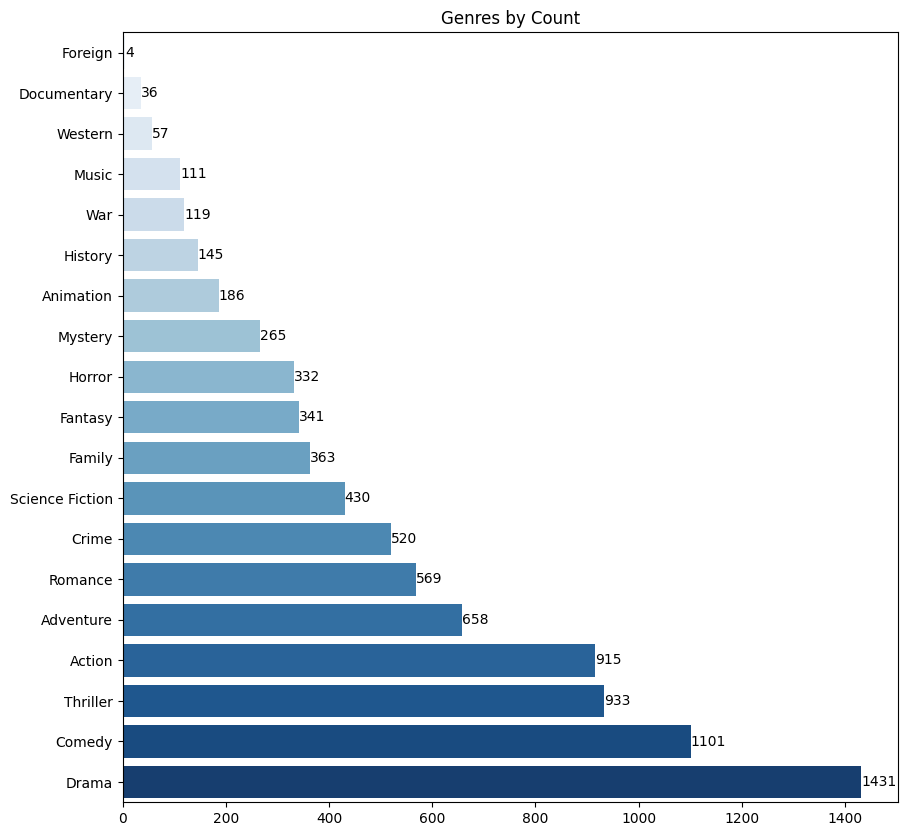

In [74]:
# Copy of plot from above

# Sort data count by genres to ascending order.
sorted_genres = temp_movies_df["genres"].value_counts().sort_values(ascending=True)

# Bar plot of Genres for each Movie (modified code from above)
plt.figure(figsize = (10,10))
ax = sns.barplot(x=sorted_genres.values, 
                 y=sorted_genres.index, 
                 orient='h',
                 palette="Blues")

# Customise plot
plt.title("Genres by Count")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

# Show plot
plt.show()
plt.close()

#### Generate three different interesting visualisations with a data story.

See Plots Above else refer to the Main Report

1) Movie Vote_Average per Decade

Note - The downwards shift per decade in vote average (collectively for all movies). Did webecame more critical of movies as a whole or is there just so many more films about than in previous years? More films, greater normalisation/ chance of poorer quality films being produced? More research is required into what causes a lower voter average score. We could look at genre, but i guess many more things outside this dataset would influence this, screenplay, actors, production, politics, changing tastes in genre etc. Also see Scaled Matrix 2 Year vs. Vote_Average.

2) Mean Values per Decade

Note - What happened in the 1970s to cause movie revenue/buget relationship to change? When looking at scaled budgets and revenues there is a point in 1970s when the magnitude of mean scaled budgets overtakes mean scaled revenues. Unscaled revenues are still higher than unscaled budgets but prior to 1970s both scaled budget and revenue relationship was linear. Transistioning to a non-linear relationship could be due to a number of factors such as technology change, changes in the film industry/film making techniques, or economic factors like inflation or US Economic policy. More research would have to be done...

3) Vote_Average per Genre

Note - Films that were the most profitable/make the largest revenue were likly to be Adventure/Fantasy/Animation (see revenue by genre boxplots). Whereas theWar, History and Documentary genres were some of the film genres to produce the least revenue by mean value. It was surprising to see the same low mean revenue genres for War, History and Documentry had higher mean vote average counts in comparison (see vote average by genre boxplots). Is it because they deal with real-life events more so then fantasy? Important to note that War, History and Documentrary films have lower vote counts, so does it mean that these types of films are made to a higher quality to achive a higher vote average or is it because we do have as much variety of voter? 

#### Next Steps

To understand profitability per genre better, next steps should include the assessment of all currency data type values, standardising and adjusting for inflation. Current figures do not appear to take into account such changes in purchasing power. They do however show changes in viewer taste and desirability of film genres over the decades.

## Improved Analysis included in main report.